Libraries 

In [825]:
import matplotlib.pyplot as plt
import numpy as np
import random
from blocksclass import blocks
from blocksclass import bigblocks
from blocksclass import pulleys
from blocksclass import phystr
import math
from collections import Counter
import random
import json
from blocksclass import normals
from blocksclass import grounds

User Defined Data

In [826]:
input_no = 55
level = 1
inputarr = ["b1n1135B", "b1u045tp14500u180b2"]

weight = [30, 40]
ext_force = [0, 0, 0, 0]  # y,x format
# position of force on block in diagram
dir_ext_force = ['t', 'r', 't', 'r', 't', 'r']

b_size = [[30, 30], [30, 30]]
c_size = [150]
p_radius = [10]

bb = bigblocks(number=1, type="tr", rangle=90, langle=45, block={"1": [1, "l", [-50, -50]]},
               rpulley=0, lpulley=0, cpulley=1, mass=(-1), size=[100, 100])


Initialise the variables

In [827]:
print(bb.mass)

-1


In [828]:
print(type(bb))

<class 'blocksclass.bigblocks'>


In [829]:
fixed = []
bigblock = []
new_fixed = []
block = []
phstr = []
ground = []
ceiling = []
normal = []
pulle = []

n_b = 0
n_p = 0
n_n = 0
n_o = 0
n_B = 0
n_c = 0

strarr = []
mgmatr = []

In [830]:
# Number of strings nikalne ke liye
for i in inputarr:
    if ('n' not in i):
        strarr.append(i)

In [831]:
print(strarr)

['c1u090tp10000u270b1', 'mp1u090tp29000u180b2']


In [832]:
# mgmatr banane ke liye
for i in range(len(ext_force)):
    if (i % 2 == 0):
        mgmatr.append((-1)*ext_force[i]+weight[i//2])
    else:
        mgmatr.append((-1)*ext_force[i])

In [833]:
print(mgmatr)

[30, 0, 40, 0]


In [834]:
for f in range(len(fixed)):
    new_fixed.append((fixed[f] * 2) - 2)
    f = f+1

for q in range(len(bigblock)):    # including big block as fixed
    new_fixed.append((bigblock[q] * 2) - 2)
    q = q+1


In [835]:
no_of_strings = len(inputarr)
phystr_no = 0

# Objects ko count karne
for strno in range(no_of_strings):
    input = inputarr[strno]
    strindex = strno

    s = len(input)
    i = 0
    while i < s:
        if(input[i] == "b" and int(input[i+1]) > n_b):
            n_b = n_b + 1
        if(input[i] == "p" and int(input[i+1]) > n_p):
            n_p = n_p + 1
        if(input[i] == "n" and int(input[i+1]) > n_n):
            n_n = n_n + 1
        if(input[i] == "c" and int(input[i+1]) > n_c):
            n_c = n_c + 1
        if(input[i] == "B" and n_B == 0):
            bigblock.append(bb)
            n_B = n_B + 1
        i = i + 1

In [836]:
pulley_bb = []
if(n_B == 1):
    if(bb.rpulley != 0):
        pulley_bb.append(bb.rpulley)
    if(bb.lpulley != 0):
        pulley_bb.append(bb.lpulley)
    if(bb.cpulley != 0):
        pulley_bb.append(bb.cpulley)

# Jo pulley attached he bb ke saath, usko ek object hi consider kare
n_Bp = len(pulley_bb)

n_p = n_p-n_Bp  # Jo pulley attached nahi he bb ke saath

n_Bb = n_b + n_B

if(bb.mass > 0):
    n_o = n_Bb + n_p
else:
    n_Bb = n_b
    n_o = n_b + n_p

#n_B is 1 if bb exists, 0 otherwise

# n_o me bigblock count hoga as an object agar wo movable he, nhi toh bas ek ceiling ki tarah act karega
for b_i in range(n_b):
    angle=(-1)
    for i in bb.block:
        if(bb.block[i][0]==(b_i+1)):
            if(bb.block[i][1]=="l"):
                angle = bb.langle
            elif(bb.block[i][1] == "r"):
                angle = bb.rangle
            break
    block.append(blocks(b_i, [0, 0], [0, 0], weight[b_i], bb=angle, forces={"y": [
                 ext_force[2*b_i], dir_ext_force[2*b_i]], "x": [ext_force[2*b_i+1], dir_ext_force[2*b_i+1]]},size=b_size[b_i]))

In [837]:
for p_i in range(1, n_p+n_Bp+1):
    if(p_i in pulley_bb):
        pulle.append(pulleys(p_i-1, [0, 0], p_radius[p_i-1], [0,0], 1))
    else:
        pulle.append(pulleys(p_i-1, [0, 0], p_radius[p_i-1], [0, 0], 0))

for n_i in range(n_n):
    normal.append(normals(n_i, [0, 0], 0, 0))

for nc_i in range(n_c):
    ceiling.append(grounds(nc_i, [0, 225], 0, c_size[nc_i], 't'))

In [838]:
n = n_o * 2 + len(inputarr)
n_start = n - n_n   # no of strings here is actually all input
matr = np.zeros((n, n))
phstr_no = 1

num_norm = 0  # Number of normals passed

ref_point_set = 0
phystr_no = 0
temp = 0
act_nos = no_of_strings - n_n  # actual no of strings
pb=0

Loop to update A matrix

In [839]:
for strno in range(no_of_strings):
    input = inputarr[strno]
    strindex = strno
    s = len(input)
    j = 0
    if(temp == 1):
        num_norm += 1
        temp = 0
    while j < s:
        if(input[j] == "B" and bb.mass > 0 and (j+1) < s):
            if(input[j+1] == "n"):
                temp = 1
                index_1 = int(input[j+7])*2 - 1
                angle = int(input[j+3] + input[j+4] + input[j+5]) * (np.pi)/180
                coeff_y = -1*np.sin(angle)
                coeff_x = -1*np.cos(angle)

                normal[int(input[j+2]) - 1].obj[1] = "B"
                normal[int(input[j+2]) - 1].obj[0] = input[j+6:j+8]
                normal[int(input[j+2]) - 1].angle = angle

                if(input[j+6] == "b"):
                    normal[int(input[j+2])-1].contains_grnd = 0

                    matr[n_b*2, n_start + int(input[j+2]) - 1] = (-1)*coeff_y
                    matr[n_b*2+1, n_start + int(input[j+2]) - 1] = (-1)*coeff_x
                    matr[index_1 - 1, n_start + int(input[j+2]) - 1] = coeff_y
                    matr[index_1, n_start + int(input[j+2]) - 1] = coeff_x
                    # wedge constraint
                    matr[n_start + int(input[j+2]) - 1, n_b*2] = (-1)*coeff_y
                    matr[n_start + int(input[j+2]) - 1, index_1 - 1] = coeff_y
                    matr[n_start + int(input[j+2]) - 1, n_b*2+1] = (-1)*coeff_x
                    matr[n_start + int(input[j+2]) - 1, index_1] = coeff_x
                else:
                    matr[n_b*2, n_start + int(input[j+2]) - 1] = (-1)*coeff_y
                    matr[n_b*2 + 1, n_start +
                         int(input[j+2]) - 1] = (-1)*coeff_x
                    # wedge constraint
                    matr[n_start + int(input[j+2]) - 1, n_b*2] = (-1)*coeff_y
                    matr[n_start + int(input[j+2]) - 1,
                         n_b*2 + 1] = (-1)*coeff_x
                    normal[int(input[j+2])-1].contains_grnd = 1

                if(input[j+6] == "c" and ceiling[int(input[j+7]) - 1].pos_init == 0):
                    # Update code to find position of ground wrt bb
                    ceiling[int(input[j+7]) - 1].loc[0] = -1
                    ceiling[int(input[j+7]) - 1].loc[1] = - \
                        1  # lower plane of bigblock
                    ceiling[int(input[j+7]) - 1].pos_init = 1
                    ceiling[int(input[j+7]) - 1].position = 'b'

        if(input[j] == "b"):
            index = int(input[j+1])*2-1
            if((j+2) >= s):
                if(input[j-4] == "u"):
                    angle = int(input[j-3] + input[j-2] +
                                input[j-1]) * (np.pi)/180
                    #temp = angle
                    #print( temp )
                    coeff_y = -1 * np.cos(angle)
                    coeff_x = -1 * np.sin(angle)
                    matr[index - 1, n_o*2 + strindex - num_norm] = coeff_y
                    matr[index, n_o*2 + strindex - num_norm] = coeff_x
                    matr[n_o * 2 + strindex - num_norm,
                         index - 1] = (-1) * coeff_y
                    matr[n_o * 2 + strindex - num_norm, index] = (-1) * coeff_x
            else:
                if(input[j+2] == "u"):
                    angle = int(input[j+3] + input[j+4] +
                                input[j+5]) * (np.pi)/180
                    degree = int(input[j+3] + input[j+4] + input[j+5])
                    coeff_y = 1 * np.cos(angle)
                    coeff_x = 1 * np.sin(angle)
                    matr[index - 1, n_o*2 + strindex - num_norm] = coeff_y
                    matr[index, n_o*2 + strindex - num_norm] = coeff_x
                    matr[n_o * 2 + strindex - num_norm,
                         index - 1] = -1 * coeff_y
                    matr[n_o * 2 + strindex - num_norm, index] = -1 * coeff_x

                    if(block[int(input[j+1]) - 1].pos_init == 0 and ref_point_set == 0):
                        block[int(input[j+1]) - 1].loc = [150, 150]
                        block[int(input[j+1]) - 1].pos_init = 1
                        ref_point_set = 1

                    if(input[j + 6] == "t"):
                        ran_length = random.randint(50, 100)
                        extra_theta = math.atan(
                            pulle[int(input[j+8]) - 1].radius / ran_length)
                        total_angle = angle + extra_theta
                        block_pull_dis = np.power(
                            np.power(ran_length, 2)+np.power(pulle[int(input[j+8]) - 1].radius, 2), 0.5)

                        if(pulle[int(input[j+8]) - 1].pos_init == 0):
                            pulle[int(input[j+8]) - 1].centre[0] = block[int(input[j+1]
                                                                             ) - 1].loc[0] + block_pull_dis * np.sin(total_angle)
                            pulle[int(input[j+8]) - 1].centre[1] = block[int(input[j+1]
                                                                             ) - 1].loc[1] + block_pull_dis * np.cos(total_angle)

                            pulle[int(input[j+8]) - 1].pos_init = 1

                        if(block[int(input[j+1]) - 1].pos_init == 0):
                            block[int(input[j+1]) - 1].loc[0] = pulle[int(input[j+8]) -
                                                                      1].centre[0] - block_pull_dis * np.sin(total_angle)
                            block[int(input[j+1]) - 1].loc[1] = pulle[int(input[j+8]) -
                                                                      1].centre[1] - block_pull_dis * np.cos(total_angle)

                            block[int(input[j+1]) - 1].pos_init = 1

                        phstr.append(phystr(phstr_no, block[int(
                            input[j+1]) - 1], pulle[int(input[j+8]) - 1], angle, strindex-num_norm+1, toc="mt"))
                        phstr_no = phstr_no + 1

                    elif(input[j + 6] == "m" and pulle[int(input[j+8]) - 1].pos_init == 0):
                        pulle[int(input[j+8]) - 1].centre[0] = block[int(input[j+1]) -
                                                                     1].loc[0] + random.randint(50, 100) * np.sin(angle)
                        pulle[int(input[j+8]) - 1].centre[1] = block[int(input[j+1]) -
                                                                     1].loc[1] + random.randint(50, 100) * np.cos(angle)
                        pulle[int(input[j+8]) - 1].pos_init = 1
                        phstr.append(phystr(phstr_no, block[int(
                            input[j+1]) - 1], pulle[int(input[j+8]) - 1], angle, strindex-num_norm+1, toc="mm"))
                        phstr_no = phstr_no + 1

                    elif(input[j+6] == "b" and block[int(input[j+7]) - 1].pos_init == 0):
                        block[int(input[j+7]) - 1].loc[0] = block[int(input[j+1]) -
                                                                  1].loc[0] + random.randint(50, 100) * np.sin(angle)
                        block[int(input[j+7]) - 1].loc[1] = block[int(input[j+1]) -
                                                                  1].loc[1] + random.randint(50, 100) * np.cos(angle)
                        block[int(input[j+7]) - 1].pos_init = 1
                        phstr.append(phystr(phstr_no, block[int(
                            input[j+1]) - 1], block[int(input[j+7]) - 1], angle, strindex-num_norm+1, toc="mm"))
                        phstr_no = phstr_no + 1

                    elif(input[j+6] == "c" and ceiling[int(input[j+7]) - 1].pos_init == 0):
                        ceiling[int(input[j+7]) - 1].loc[0] = block[int(input[j+1]) -
                                                                    1].loc[0] + random.randint(50, 100) * np.sin(angle)
                        ceiling[int(input[j+7]) - 1].loc[1] = block[int(input[j+1]) -
                                                                    1].loc[1] + random.randint(50, 100) * np.cos(angle)
                        ceiling[int(input[j+7]) - 1].pos_init = 1
                        if (degree == 0):
                            ceiling[int(input[j+7]) - 1].position = 't'
                        elif (degree == 90):
                            ceiling[int(input[j+7]) - 1].position = 'r'
                        elif (degree == 180):
                            ceiling[int(input[j+7]) - 1].position = 'b'
                        elif (degree == 270):
                            ceiling[int(input[j+7]) - 1].position = 'l'
                        phstr.append(phystr(phstr_no, block[int(
                            input[j+1]) - 1], ceiling[int(input[j+7]) - 1], angle, strindex-num_norm+1, toc="mm"))
                        phstr_no = phstr_no + 1
                else:
                    if(input[j+2] == "n"):
                        temp = 1
                        angle = int(input[j+4] + input[j+5] +
                                    input[j+6]) * (np.pi)/180
                        degree = int(input[j+4] + input[j+5] +input[j+6])
                        print("degree = ", degree)
                        coeff_y = -1*np.sin(angle)
                        coeff_x = -1*np.cos(angle)

                        normal[int(input[j+3]) - 1].obj[1] = input[j:j+2]  # b2
                        normal[int(input[j+3]) -
                               1].obj[0] = input[j+7:j+9]  # b1
                        normal[int(input[j+3]) - 1].angle = angle

                        if(block[int(input[j+1]) - 1].pos_init == 0 and ref_point_set == 0):
                            block[int(input[j+1]) - 1].loc = [150, 150]
                            block[int(input[j+1]) - 1].pos_init = 1
                            ref_point_set = 1

                        if(input[j+7] == "b"):
                            index_1 = int(input[j+8])*2 - 1
                            normal[int(input[j+3])-1].contains_grnd = 0

                            matr[index - 1, n_start +
                                 int(input[j+3]) - 1] = (-1)*coeff_y
                            matr[index, n_start +
                                 int(input[j+3]) - 1] = (-1)*coeff_x
                            matr[index_1 - 1, n_start +
                                 int(input[j+3]) - 1] = coeff_y
                            matr[index_1, n_start +
                                 int(input[j+3]) - 1] = coeff_x
                            # wedge constraint
                            matr[n_start + int(input[j+3]) - 1,
                                 index - 1] = (-1)*coeff_y
                            matr[n_start + int(input[j+3]) - 1,
                                 index_1 - 1] = coeff_y
                            matr[n_start + int(input[j+3]) - 1,
                                 index] = (-1)*coeff_x
                            matr[n_start + int(input[j+3]) - 1,
                                 index_1] = coeff_x
                        elif(input[j+7] == "B"):
                            if(bb.mass > 0):
                                normal[int(input[j+3])-1].contains_grnd = 0
                                matr[index - 1, n_start +
                                     int(input[j+3]) - 1] = (-1)*coeff_y
                                matr[index, n_start +
                                     int(input[j+3]) - 1] = (-1)*coeff_x
                                matr[n_b*2, n_start +
                                     int(input[j+3]) - 1] = coeff_y
                                matr[n_b*2+1, n_start +
                                     int(input[j+3]) - 1] = coeff_x
                                # wedge constraint
                                matr[n_start + int(input[j+3]) - 1,
                                     index - 1] = (-1)*coeff_y
                                matr[n_start +
                                     int(input[j+3]) - 1, n_b*2] = coeff_y
                                matr[n_start +
                                     int(input[j+3]) - 1, index] = (-1)*coeff_x
                                matr[n_start +
                                     int(input[j+3]) - 1, n_b*2 + 1] = coeff_x
                            else:
                                matr[index - 1, n_start +
                                     int(input[j+3]) - 1] = (-1)*coeff_y
                                matr[index, n_start +
                                     int(input[j+3]) - 1] = (-1)*coeff_x
                                # wedge constraint
                                matr[n_start + int(input[j+3]) - 1,
                                     index - 1] = (-1)*coeff_y
                                matr[n_start +
                                     int(input[j+3]) - 1, index] = (-1)*coeff_x
                                normal[int(input[j+3])-1].contains_grnd = 1
                        else:
                            matr[index - 1, n_start +
                                 int(input[j+3]) - 1] = (-1)*coeff_y
                            matr[index, n_start +
                                 int(input[j+3]) - 1] = (-1)*coeff_x
                            # wedge constraint
                            matr[n_start + int(input[j+3]) - 1,
                                 index - 1] = (-1)*coeff_y
                            matr[n_start + int(input[j+3]) - 1,
                                 index] = (-1)*coeff_x
                            normal[int(input[j+3])-1].contains_grnd = 1

                        if(input[j+7] == "c"):
                            ceiling[int(input[j+8]) - 1].loc[0] = block[int(input[j+1]) - 1].loc[0] - (block[int(input[j+1]) - 1].size[0]) * 0.5 * np.cos(angle)
                            ceiling[int(input[j+8]) - 1].loc[1] = block[int(input[j+1]) - 1].loc[1] - (block[int(input[j+1]) - 1].size[0]) * 0.5 * np.sin(angle)
                            ceiling[int(input[j+8]) - 1].pos_init = 1
                            
                            if (degree == 0):
                                ceiling[int(input[j+8]) - 1].position = 'l'
                            elif (degree == 90):
                                ceiling[int(input[j+8]) - 1].position = 'b'
                            elif (degree == 180):
                                ceiling[int(input[j+8]) - 1].position = 'r'
                            elif (degree == 270):
                                ceiling[int(input[j+8]) - 1].position = 't'


                        if(input[j+7] == "B"):
                            for i in bb.block:
                                if(bb.block[i][0]==int(input[j+1])):
                                    bb.block[i][2][0] = -1*(
                                        block[int(input[j+1]) - 1].size[0]) * 0.5 * np.cos(angle)
                                    bb.block[i][2][1] = -1*(
                                        block[int(input[j+1]) - 1].size[0]) * 0.5 * np.sin(angle)

                        if(input[j+7] == "b" and block[int(input[j+1]) - 1].pos_init == 0):
                            block[int(input[j+1]) - 1].loc[0] = block[int(input[j+8]) - 1].loc[0] + (block[int(
                                input[j+1]) - 1].size[0]+block[int(input[j+8]) - 1].size[0]) * 0.5 * np.cos(angle)
                            block[int(input[j+1]) - 1].loc[1] = block[int(input[j+8]) - 1].loc[1] + (block[int(
                                input[j+1]) - 1].size[0]+block[int(input[j+8]) - 1].size[0]) * 0.5 * np.sin(angle)
                            block[int(input[j+1]) - 1].pos_init = 1
                        if(input[j+7] == "b" and block[int(input[j+8]) - 1].pos_init == 0):
                            block[int(input[j+8]) - 1].loc[0] = block[int(input[j+1]) - 1].loc[0] - (block[int(
                                input[j+1]) - 1].size[0]+block[int(input[j+8]) - 1].size[0]) * 0.5 * np.cos(angle)
                            block[int(input[j+8]) - 1].loc[1] = block[int(input[j+1]) - 1].loc[1] - (block[int(
                                input[j+1]) - 1].size[0]+block[int(input[j+8]) - 1].size[0]) * 0.5 * np.sin(angle)
                            block[int(input[j+8]) - 1].pos_init = 1

        if(input[j] == "p"):
            if(pulle[int(input[j+1])-1].bb==1):
                pb+=1
            index = ((n_o-n_p) * 2 + 1) + (int(input[j + 1]) - 1)*2 - pb*2

            if(input[j-1] == "m" and j+2 >= s):
                angle = int(input[j-4] + input[j-3] + input[j-2]) * (np.pi)/180
                coeff_y = -1 * np.cos(angle)
                coeff_x = -1 * np.sin(angle)
            else:
                if(input[j-1] == "m"):
                    angle = int(input[j+3] + input[j+4] +
                                input[j+5]) * (np.pi)/180
                    degree = int(input[j+3] + input[j+4] + input[j+5])
                    coeff_y = 1 * np.cos(angle)
                    coeff_x = 1 * np.sin(angle)
                    if(ref_point_set == 0):
                        pulle[int(input[j+1]) - 1].loc = [150, 150]
                        pulle[int(input[j+1]) - 1].pos_init = 1
                        ref_point_set = 1
                    if(input[j + 6] == "b" and block[int(input[j+7]) - 1].pos_init == 0):
                        block[int(input[j+7]) - 1].loc[0] = pulle[int(input[j+1]) -
                                                                  1].centre[0] + random.randint(50, 100) * np.sin(angle)
                        block[int(input[j+7]) - 1].loc[1] = pulle[int(input[j+1]) -
                                                                  1].centre[1] + random.randint(50, 100) * np.cos(angle)
                        block[int(input[j+7]) - 1].pos_init = 1
                        phstr.append(phystr(phstr_no, pulle[int(
                            input[j+1]) - 1], block[int(input[j+7]) - 1], angle, strindex-num_norm+1, toc="mm"))
                        phstr_no = phstr_no + 1

                    if(input[j + 6] == "t" and pulle[int(input[j+8]) - 1].pos_init == 0):
                        ran_length = random.randint(50, 100)
                        extra_theta = math.atan(
                            pulle[int(input[j+8]) - 1].radius / ran_length)
                        total_angle = angle + extra_theta
                        pull_pull_dis = np.power(
                            np.power(ran_length, 2)+np.power(pulle[int(input[j+8]) - 1].radius, 2), 0.5)
                        pulle[int(input[j+8]) - 1].centre[0] = pulle[int(input[j+1]
                                                                         ) - 1].centre[0] + pull_pull_dis * np.sin(total_angle)
                        pulle[int(input[j+8]) - 1].centre[1] = pulle[int(input[j+1]
                                                                         ) - 1].centre[1] + pull_pull_dis * np.cos(total_angle)
                        pulle[int(input[j+8]) - 1].pos_init = 1
                        phstr.append(phystr(phstr_no, pulle[int(
                            input[j+1]) - 1], pulle[int(input[j+8]) - 1], angle, strindex-num_norm+1, toc="mt"))
                        phstr_no = phstr_no + 1

                    if(input[j + 6] == "c" and ceiling[int(input[j+7]) - 1].pos_init == 0):
                        ceiling[int(
                            input[j+7]) - 1].loc[0] = pulle[int(input[j+1]) - 1].centre[0] + 20*np.sin(angle)
                        ceiling[int(input[j+7]) - 1].loc[1] = pulle[int(input[j+1]
                                                                        ) - 1].centre[1] + 20*np.cos(angle)
                        #block[int(input[j+7]) - 1].loc[1] = pulle[int(input[j+1]) - 1].centre[1] + random.randint(50,100)* np.cos(angle)
                        ceiling[int(input[j+7]) - 1].pos_init = 1
                        #print( block[int(input[j+7]) - 1].loc)
                        print(int(input[j+7])-1)
                        if (degree == 0):
                            ceiling[int(input[j+7]) - 1].position = 't'
                        elif (degree == 90):
                            ceiling[int(input[j+7]) - 1].position = 'r'
                        elif (degree == 180):
                            ceiling[int(input[j+7]) - 1].position = 'b'
                        elif (degree == 270):
                            ceiling[int(input[j+7]) - 1].position = 'l'

                    if(input[j + 6] == "c"):
                        phstr.append(phystr(phstr_no, pulle[int(
                            input[j+1]) - 1], ceiling[int(input[j+7]) - 1], angle, strindex-num_norm+1, toc="mm"))
                        phstr_no = phstr_no + 1

                        

            if(input[j-1] == "t"):
                angle_1 = int(input[j+2] + input[j+3]) * (np.pi)/180
                angle_2 = int(input[j+4] + input[j+5]) * (np.pi)/180
                angl = int(input[j+7] + input[j+8] + input[j+9]) * (np.pi)/180
                if(int(input[j+7] + input[j+8] + input[j+9]) == 270):
                    coeff_y = - (np.sin(angle_1) - np.sin(angle_2))
                    coeff_x = - (np.cos(angle_1) + np.cos(angle_2))
                else:
                    coeff_y = - (np.cos(angle_1) + np.cos(angle_2))
                    coeff_x = - (np.sin(angle_1) - np.sin(angle_2))
                if(pulle[int(input[j+1]) - 1].pos_init == 0 and ref_point_set == 0):
                    pulle[int(input[j+1]) - 1].loc = [150, 150]
                    pulle[int(input[j+1]) - 1].pos_init = 1
                    ref_point_set = 1
                if(input[j + 10] == "b" and block[int(input[j+11]) - 1].pos_init == 0):
                    ran_length = random.randint(50, 100)
                    extra_theta = math.atan(
                        pulle[int(input[j+1]) - 1].radius / ran_length)
                    angl = int(input[j+7] + input[j+8] +
                               input[j+9]) * (np.pi)/180
                    total_angle = int(
                        input[j+7] + input[j+8] + input[j+9]) * (np.pi)/180 - extra_theta
                    pull_block_dis = np.power(
                        np.power(ran_length, 2)+np.power(pulle[int(input[j+1]) - 1].radius, 2), 0.5)
                    block[int(input[j+11]) - 1].loc[0] = round(pulle[int(input[j+1]
                                                                         ) - 1].centre[0] + pull_block_dis * np.sin(total_angle))
                    block[int(input[j+11]) - 1].loc[1] = round(pulle[int(input[j+1]
                                                                         ) - 1].centre[1] + pull_block_dis * np.cos(total_angle))
                    block[int(input[j+11]) - 1].pos_init = 1
                    phstr.append(phystr(phstr_no, pulle[int(
                        input[j+1]) - 1], block[int(input[j+11]) - 1], angl, strindex-num_norm+1, toc="tm"))
                    phstr_no = phstr_no + 1
                if(input[j + 10] == "c" and ceiling[int(input[j+11]) - 1].pos_init == 0):
                    ran_length = random.randint(50, 100)
                    extra_theta = math.atan(
                        pulle[int(input[j+1]) - 1].radius / ran_length)
                    angl = int(input[j+7] + input[j+8] +
                               input[j+9]) * (np.pi)/180
                    total_angle = int(
                        input[j+7] + input[j+8] + input[j+9]) * (np.pi)/180 - extra_theta
                    pull_block_dis = np.power(
                        np.power(ran_length, 2)+np.power(pulle[int(input[j+1]) - 1].radius, 2), 0.5)
                    ceiling[int(input[j+11]) - 1].loc[0] = round(pulle[int(input[j+1]
                                                                         ) - 1].centre[0] + pull_block_dis * np.sin(total_angle))
                    ceiling[int(input[j+11]) - 1].loc[1] = round(pulle[int(input[j+1]
                                                                         ) - 1].centre[1] + pull_block_dis * np.cos(total_angle))
                    ceiling[int(input[j+11]) - 1].pos_init = 1

                if(input[j + 10] == "c"):
                    phstr.append(phystr(phstr_no, pulle[int(
                        input[j+1]) - 1], ceiling[int(input[j+11]) - 1], angl, strindex-num_norm+1, toc="tm"))
                    phstr_no = phstr_no + 1

                if(input[j - 7] == "c" and ceiling[int(input[j - 6]) - 1].pos_init == 0):
                    angle = int(input[j-4] + input[j-3] +
                                input[j-2]) * (np.pi)/180
                    degree = int(input[j-4] + input[j-3] + input[j-2])

                    ran_length = random.randint(50, 100)
                    extra_theta = math.atan(
                        pulle[int(input[j+1]) - 1].radius / ran_length)
                    total_angle = angle + extra_theta
                    ceiling_pull_dis = np.power(
                        np.power(ran_length, 2)+np.power(pulle[int(input[j+1]) - 1].radius, 2), 0.5)

                    ceiling[int(input[j-6]) - 1].loc[0] = pulle[int(input[j+1]) -
                                                                1].centre[0] - ceiling_pull_dis * np.sin(total_angle)
                    ceiling[int(input[j-6]) - 1].loc[1] = pulle[int(input[j+1]) -
                                                                1].centre[1] - ceiling_pull_dis * np.cos(total_angle)

                    #block[int(input[j+11]) - 1].loc[1] = round(pulle[int(input[j+1]) - 1].centre[1] + pull_block_dis* np.cos(total_angle))
                    ceiling[int(input[j-6]) - 1].pos_init = 1
                    if (degree == 0):
                        ceiling[int(input[j-6]) - 1].position = 'b'
                    elif (degree == 90):
                        ceiling[int(input[j-6]) - 1].position = 'l'
                    elif (degree == 180):
                        ceiling[int(input[j-6]) - 1].position = 't'
                    elif (degree == 270):
                        ceiling[int(input[j-6]) - 1].position = 'r'

                    #print( block[int(input[j+11]) - 1].loc)
                    
                if(input[j - 7] == "c"):
                    phstr.append(phystr(phstr_no, pulle[int(
                        input[j+1]) - 1], ceiling[int(input[j-6]) - 1], angle, strindex-num_norm+1, toc="tm"))
                    phstr_no = phstr_no + 1

                if(input[j + 10] == "c" and ceiling[int(input[j+11]) - 1].pos_init == 0):

                    ran_length = random.randint(50, 100)
                    extra_theta = math.atan(pulle[int(input[j+1]) - 1].radius / ran_length)
                    total_angle = angl + extra_theta
                    ceiling_pull_dis = np.power(np.power(ran_length, 2)+np.power(pulle[int(input[j+1]) - 1].radius, 2), 0.5)

                    ceiling[int(input[j+11]) - 1].loc[0] = pulle[int(input[j+1]) -1].centre[0] + ceiling_pull_dis * np.sin(total_angle)
                    ceiling[int(input[j+11]) - 1].loc[1] = pulle[int(input[j+1]) -1].centre[1] - ceiling_pull_dis * np.cos(total_angle)

                    ceiling[int(input[j+11]) - 1].pos_init = 1
                    if (degree == 0):
                        ceiling[int(input[j+11]) - 1].position = 't'
                    elif (degree == 90):
                        ceiling[int(input[j+11]) - 1].position = 'r'
                    elif (degree == 180):
                        ceiling[int(input[j+11]) - 1].position = 'b'
                    elif (degree == 270):
                        ceiling[int(input[j+11]) - 1].position = 'l'

                if(input[j + 10] == "c"):
                    #print( block[int(input[j+11]) - 1].loc)
                    phstr.append(phystr(phstr_no, pulle[int(
                        input[j+1]) - 1], ceiling[int(input[j+11]) - 1], angl, strindex-num_norm+1, toc="tm"))
                    phstr_no = phstr_no + 1

                if(input[j + 10] == "z" and pulle[int(input[j+12]) - 1].pos_init == 0):
                    ran_length = random.randint(50, 100)
                    extra_theta = math.atan(
                        2*pulle[int(input[j+1]) - 1].radius / ran_length)
                    angl = int(input[j+7] + input[j+8] +
                               input[j+9]) * (np.pi)/180
                    total_angle = angl - extra_theta
                    pull_pull_dis = np.power(
                        np.power(ran_length, 2)+np.power(2*pulle[int(input[j+12]) - 1].radius, 2), 0.5)
                    pulle[int(input[j+12]) - 1].centre[0] = pulle[int(input[j+1]
                                                                      ) - 1].centre[0] + pull_pull_dis * np.sin(total_angle)
                    pulle[int(input[j+12]) - 1].centre[1] = pulle[int(input[j+1]
                                                                      ) - 1].centre[1] + pull_pull_dis * np.cos(total_angle)
                    pulle[int(input[j+12]) - 1].pos_init = 1
                    phstr.append(phystr(phstr_no, pulle[int(
                        input[j+1]) - 1], pulle[int(input[j+12]) - 1], angl, strindex-num_norm+1, toc="tz"))
                    phstr_no = phstr_no + 1
                if(input[j + 10] == "m" and pulle[int(input[j+12]) - 1].pos_init == 0):
                    ran_length = random.randint(50, 100)
                    extra_theta = math.atan(
                        pulle[int(input[j+1]) - 1].radius / ran_length)
                    angl = int(input[j+7] + input[j+8] +
                               input[j+9]) * (np.pi)/180
                    total_angle = angl - extra_theta
                    pull_pull_dis = np.power(
                        np.power(ran_length, 2)+np.power(pulle[int(input[j+1]) - 1].radius, 2), 0.5)
                    pulle[int(input[j+12]) - 1].centre[0] = round(pulle[int(input[j+1]
                                                                            ) - 1].centre[0] + pull_pull_dis * np.sin(total_angle))
                    pulle[int(input[j+12]) - 1].centre[1] = round(pulle[int(input[j+1]
                                                                            ) - 1].centre[1] + pull_pull_dis * np.cos(total_angle))
                    pulle[int(input[j+12]) - 1].pos_init = 1
                    #print( phstr_no )
                    phstr.append(phystr(phstr_no, pulle[int(
                        input[j+1]) - 1], pulle[int(input[j+12]) - 1], angl, strindex-num_norm+1, toc="tm"))
                    phstr_no = phstr_no + 1
            if(input[j-1] == "z"):
                angle_1 = int(input[j+2] + input[j+3]) * (np.pi)/180
                angle_2 = int(input[j+4] + input[j+5]) * (np.pi)/180
                angl = int(input[j+7] + input[j+8] + input[j+9]) * (np.pi)/180

                coeff_y = (np.cos(angle_1) + np.cos(angle_2))
                coeff_x = - (np.sin(angle_1) - np.sin(angle_2))
                if(pulle[int(input[j+1]) - 1].pos_init == 0 and ref_point_set == 0):
                    pulle[int(input[j+1]) - 1].loc = [150, 150]
                    pulle[int(input[j+1]) - 1].pos_init = 1
                    ref_point_set = 1
                if(input[j + 10] == "b" and block[int(input[j+11]) - 1].pos_init == 0):
                    ran_length = random.randint(50, 100)
                    extra_theta = math.atan(
                        pulle[int(input[j+1]) - 1].radius / ran_length)
                    total_angle = int(
                        input[j+7] + input[j+8] + input[j+9]) * (np.pi)/180 - extra_theta
                    block_pull_dis = np.power(
                        np.power(ran_length, 2)+np.power(pulle[int(input[j+1]) - 1].radius, 2), 0.5)
                    block[int(input[j+11]) - 1].loc[0] = pulle[int(input[j+1]) -
                                                               1].centre[0] + block_pull_dis * np.sin(total_angle)
                    block[int(input[j+11]) - 1].loc[1] = pulle[int(input[j+1]) -
                                                               1].centre[1] + block_pull_dis * np.cos(total_angle)
                    block[int(input[j+11]) - 1].pos_init = 1
                    phstr.append(phystr(phstr_no, pulle[int(
                        input[j+1]) - 1], block[int(input[j+11]) - 1], angl, strindex-num_norm+1, toc="zm"))
                    phstr_no = phstr_no + 1

                if(input[j - 7] == "c" and ceiling[int(input[j - 6]) - 1].pos_init == 0):
                    angle = int(input[j-4] + input[j-3] +
                                input[j-2]) * (np.pi)/180
                    degree = int(input[j-4] + input[j-3] + input[j-2])

                    ran_length = random.randint(50, 100)
                    extra_theta = math.atan(
                        pulle[int(input[j+1]) - 1].radius / ran_length)
                    total_angle = angle + extra_theta
                    ceiling_pull_dis = np.power(
                        np.power(ran_length, 2)+np.power(pulle[int(input[j+1]) - 1].radius, 2), 0.5)

                    ceiling[int(input[j-6]) - 1].loc[0] = pulle[int(input[j+1]) -
                                                                1].centre[0] + ceiling_pull_dis * np.sin(total_angle)
                    ceiling[int(input[j-6]) - 1].loc[1] = pulle[int(input[j+1]) -
                                                                1].centre[1] - ceiling_pull_dis * np.cos(total_angle)

                    #block[int(input[j+11]) - 1].loc[1] = round(pulle[int(input[j+1]) - 1].centre[1] + pull_block_dis* np.cos(total_angle))
                    ceiling[int(input[j-6]) - 1].pos_init = 1
                    if (degree == 0):
                        ceiling[int(input[j-6]) - 1].position = 'b'
                    elif (degree == 90):
                        ceiling[int(input[j-6]) - 1].position = 'l'
                    elif (degree == 180):
                        ceiling[int(input[j-6]) - 1].position = 't'
                    elif (degree == 270):
                        ceiling[int(input[j-6]) - 1].position = 'r'
                
                if(input[j - 7] == "c"):
                    #print( block[int(input[j+11]) - 1].loc)
                    phstr.append(phystr(phstr_no, pulle[int(
                        input[j+1]) - 1], ceiling[int(input[j-6]) - 1], angle, strindex-num_norm+1, toc="zm"))
                    phstr_no = phstr_no + 1

                if(input[j + 10] == "c" and ceiling[int(input[j+11]) - 1].pos_init == 0):

                    ran_length = random.randint(50, 100)
                    extra_theta = math.atan(
                        pulle[int(input[j+1]) - 1].radius / ran_length)
                    total_angle = angl + extra_theta
                    ceiling_pull_dis = np.power(
                        np.power(ran_length, 2)+np.power(pulle[int(input[j+1]) - 1].radius, 2), 0.5)
                    ceiling[int(input[j+11]) - 1].loc[0] = pulle[int(input[j+1]) -
                                                                 1].centre[0] + ceiling_pull_dis * np.sin(total_angle)
                    ceiling[int(input[j+11]) - 1].loc[1] = pulle[int(input[j+1]) -
                                                                 1].centre[1] + ceiling_pull_dis * np.cos(total_angle)

                    #block[int(input[j+11]) - 1].loc[1] = round(pulle[int(input[j+1]) - 1].centre[1] + pull_block_dis* np.cos(total_angle))
                    ceiling[int(input[j+11]) - 1].pos_init = 1
                    if (degree == 0):
                        ceiling[int(input[j+11]) - 1].position = 't'
                    elif (degree == 90):
                        ceiling[int(input[j+11]) - 1].position = 'r'
                    elif (degree == 180):
                        ceiling[int(input[j+11]) - 1].position = 'b'
                    elif (degree == 270):
                        ceiling[int(input[j+11]) - 1].position = 'l'

                if(input[j + 10] == "c"):
                    #print( block[int(input[j+11]) - 1].loc)
                    phstr.append(phystr(phstr_no, pulle[int(
                        input[j+1]) - 1], ceiling[int(input[j+11]) - 1], angl, strindex-num_norm+1, toc="zm"))
                    phstr_no = phstr_no + 1

                if(input[j + 10] == "t" and pulle[int(input[j+12]) - 1].pos_init == 0):
                    ran_length = random.randint(50, 100)
                    extra_theta = math.atan(
                        2*pulle[int(input[j+1]) - 1].radius / ran_length)
                    #angl = int( input[j+7] + input[j+8] + input[j+9] ) * (np.pi)/180
                    total_angle = angl - extra_theta
                    pull_pull_dis = np.power(
                        np.power(ran_length, 2)+np.power(2*pulle[int(input[j+1]) - 1].radius, 2), 0.5)
                    #extra_theta = math.atan( pulle[int(input[j+1]) - 1].radius/ ran_length )
                    total_angle = int(
                        input[j+7] + input[j+8] + input[j+9]) * (np.pi)/180 + extra_theta
                    pulle[int(input[j+12]) - 1].centre[0] = pulle[int(input[j+1]
                                                                      ) - 1].centre[0] + pull_pull_dis * np.sin(total_angle)
                    pulle[int(input[j+12]) - 1].centre[1] = pulle[int(input[j+1]
                                                                      ) - 1].centre[1] + pull_pull_dis * np.cos(total_angle)
                    pulle[int(input[j+12]) - 1].pos_init = 1
                    phstr.append(phystr(phstr_no, pulle[int(
                        input[j+1]) - 1], pulle[int(input[j+12]) - 1], angl, strindex-num_norm+1, toc="zt"))
                    phstr_no = phstr_no + 1
            if(int(input[j+1]) not in pulley_bb):
                print(index - 1, n_o*2 + strindex - num_norm)
                print(coeff_y)
                matr[index - 1, n_o*2 + strindex - num_norm] = coeff_y
                matr[index, n_o*2 + strindex - num_norm] = coeff_x
                matr[n_o * 2 + strindex - num_norm, index - 1] = -1 * coeff_y
                matr[n_o * 2 + strindex - num_norm, index] = -1 * coeff_x
            else:
                if(bb.mass > 0):
                    matr[n_b*2, n_o*2 + strindex - num_norm] = coeff_y
                    matr[n_b*2 + 1, n_o*2 + strindex - num_norm] = coeff_x
                    matr[n_o * 2 + strindex - num_norm, n_b*2] = -1 * coeff_y
                    matr[n_o * 2 + strindex - num_norm,
                         n_b*2 + 1] = -1 * coeff_x

        j = j + 1


4 6
-0.0
degree =  90
4 7
6.123233995736766e-17


In [840]:
n_p


1

In [841]:
n_b


2

Edit the A Matrix

In [842]:
# the below for loop is to make sure that all fixed objects( including ground) have 0 acc
mg_index = 0
extra_zeros = n - len(mgmatr)

for extra in range(extra_zeros):
    mgmatr.append(0)
mass_matrix = np.zeros(len(mgmatr))

for m_i in range(n_o*2 + 1):
    if(m_i % 2 == 0):
        mass_matrix[m_i] = -1 * mgmatr[m_i]/10
    else:
        mass_matrix[m_i] = -1 * mgmatr[m_i-1]/10
matr = np.around(matr, decimals=2)
for g in range(n):
    matr[g, g] = mass_matrix[g]
    mg_index = mg_index+1
    g1 = g-1     # both x and Y directions should have 0 acc for fixed
    if g in new_fixed:
        matr[g, g] = 1
        mgmatr[g] = 0
        ll = 0
        for ll in range(n):
            if(ll != g):
                matr[g, ll] = 0
            ll = ll + 1
    if g1 in new_fixed:
        matr[g, g] = 1
        mgmatr[g] = 0
        ll = 0
        for ll in range(n):
            if(ll != g):
                matr[g, ll] = 0
            ll = ll + 1
# remove zeros rows from matr
if(bb.mass > 0):
    matr[n_b*2, n_b*2] = -1*(bb.mass)
    matr[n_b*2+1, n_b*2+1] = -1*(bb.mass)
    mgmatr[n_b*2] = bb.mass


In [843]:
matr

array([[-3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0., -3.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0., -4.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0., -4.,  0.,  0.,  0., -0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., -2.,  1.,  0.],
       [-0., -1.,  0.,  0.,  0.,  2.,  0.,  0.,  0.],
       [ 0.,  0., -1.,  0., -0., -1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [844]:
zero_rows_index = []
count_1 = 0
for xx in range(n):
    count = 0
    for yy in range(n):
        if(abs(matr[xx, yy]) < 0.00001):
            count = count+1
    if(count == n):
        zero_rows_index.append(xx)
        count_1 = count_1 + 1
temp_matr = matr
# yaha zero rows gayab hoti hain
matr = np.delete(matr, zero_rows_index, axis=0)
#print( mgmatr )
mgmatr = np.delete(mgmatr, zero_rows_index, axis=None)
# yaha zerio column gayab hote hain
idx = np.argwhere(np.all(matr[..., :] == 0, axis=0))

Calculate the Variable Matrix

In [845]:
matr = np.delete(matr, idx, axis=1)
print(matr)

#mgmatr = np.delete(mgmatr, zero_rows_index[0], axis=None)
inverse = np.linalg.inv(matr)
fin = np.matmul(inverse, mgmatr)
fin__ = fin

matr__ = matr

for i in range(n_o*2-len(idx), len(fin)):
    if (fin__[i] < 0):
        matr = np.delete(matr, i, 0)
        matr = np.delete(matr, i, 1)
        mgmatr = np.delete(mgmatr, i)

inverse = np.linalg.inv(matr)
fin = np.matmul(inverse, mgmatr)
fin__ = np.around(fin__, decimals=2)
fin__[:n_o*2-len(idx)] = fin[:n_o*2-len(idx)]
j = n_o*2-len(idx)
for i in range(n_o*2-len(idx), len(fin__)):
    if (fin__[i] < 0):
        fin__[i] = 0
    else:
        fin__[i] = fin[j]
        j += 1

fin = fin__

[[-3.  0.  0.  0.  0.  0.  0.  1.]
 [ 0. -3.  0.  0.  0.  1.  0.  0.]
 [ 0.  0. -4.  0.  0.  0.  1.  0.]
 [ 0.  0.  0. -4.  0.  0. -0.  0.]
 [ 0.  0.  0.  0.  0. -2.  1.  0.]
 [-0. -1.  0.  0.  2.  0.  0.  0.]
 [ 0.  0. -1.  0. -1.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.]]


In [846]:
mgmatr

array([30,  0, 40,  0,  0,  0,  0,  0])

In [847]:
fin


array([ 0. ,  5. , -2.5,  0. ,  2.5, 15. , 30. , 30. ])

Plot the location of the objects

QnA code

In [848]:
for zero_rows_idx in zero_rows_index:
    fin = np.insert(fin, zero_rows_idx, np.zeros(1))

topmost_object_loc = 0
leftmost_object_loc = 5000
rightmost_object_loc = 0

for ply in pulle:
    if(ply.centre[1] > topmost_object_loc):
        topmost_object_loc = ply.centre[1]

for blok in block:
    if(blok.loc[0] < leftmost_object_loc):
        leftmost_object_loc = blok.loc[0]

for blok in block:
    if(blok.loc[0] > rightmost_object_loc):
        rightmost_object_loc = blok.loc[0]

text_loc = np.zeros(n_b + n_Bp + n_p)
blok_count = 0

for blok in range(len(block) + len(pulle)):
    if(blok < len(block)):
        if(block[blok].loc[0] + 10 > rightmost_object_loc):
            text_loc[blok_count] = 1
        else:
            text_loc[blok_count] = -1
    else:
        text_loc[blok_count] = 1

    blok_count = blok_count + 1

diff_tpol = 220 - topmost_object_loc  # whats this?

for pulle_count in range(len(pulle)):
    pulle[pulle_count].centre[1] = pulle[pulle_count].centre[1] + diff_tpol

for blok_count in range(len(block)):
    block[blok_count].loc[1] = block[blok_count].loc[1] + diff_tpol

for ceiling_count in range(len(ceiling)):
    ceiling[ceiling_count].loc[1] = ceiling[ceiling_count].loc[1] + diff_tpol

block_dick = {}
pulley_dick = {}
string_dick = {}
normal_dick = {}
ceiling_dick = {}
bigblock_dick = {}
equation_dick = {}


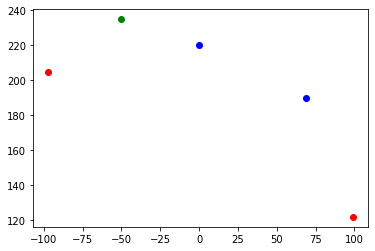

In [849]:
for i in block:
    x = (i.loc)
    plt.plot([round(x[0])], [round(x[1])], 'ro')
for i in pulle:
    x = (i.centre)
    plt.plot([round(x[0])], [round(x[1])], 'bo')
for i in ceiling:
    x = (i.loc)
    plt.plot([round(x[0])], [round(x[1])], 'go')
plt.show()

In [850]:
fin

array([ 0. ,  5. , -2.5,  0. ,  0. ,  2.5, 15. , 30. , 30. ])

In [851]:
fin_orig=np.copy(fin)

In [852]:
temp_matr

array([[-3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0., -3.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0., -4.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0., -4.,  0.,  0.,  0., -0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., -2.,  1.,  0.],
       [-0., -1.,  0.,  0.,  0.,  2.,  0.,  0.,  0.],
       [ 0.,  0., -1.,  0., -0., -1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

Convert along incline

In [853]:
mgmatr = mgmatr.tolist()
for i in range(n_b):
    if(block[i].bb == (-1)):
        continue

    angle_incline = (np.pi/180)*block[i].bb

    mg_y = mgmatr[2*i]
    mg_x = mgmatr[2*i+1]
    if(mg_y == 0):
        if(mg_x != 0):
            mgmatr.pop(i*2)
            mgmatr.insert(i*2, str(mg_x)+"cos("+str(block[i].bb)+")")
            mgmatr.pop(i*2+1)
            mgmatr.insert(i*2+1, str(mg_x)+"sin("+str(block[i].bb)+")")
    else:
        if(mg_x != 0):
            mgmatr.pop(i*2)
            mgmatr.insert(
                i*2, str(mg_y)+"sin(" + str(block[i].bb)+")+" + str(mg_x)+"cos("+str(block[i].bb) + ")")
            mgmatr.pop(i*2+1)
            mgmatr.insert(
                i*2+1, str(mg_x)+"sin("+str(block[i].bb)+")-" + str(mg_y)+"cos("+str(block[i].bb) + ")")
        else:
            mgmatr.pop(i*2)
            mgmatr.insert(i*2, str(mg_y)+"sin("+str(block[i].bb)+")")
            mgmatr.pop(i*2+1)
            mgmatr.insert(i*2+1, str(mg_y)+"cos("+str(block[i].bb)+")")
    a_y = fin[2*i]
    a_x = fin[2*i+1]

    fin[i*2] = a_y*np.sin(angle_incline) + a_x*np.cos(angle_incline)
    fin[i*2+1] = a_x*np.sin(angle_incline) - a_y*np.cos(angle_incline)

    matr_row_y = temp_matr[i*2]
    matr_row_x = temp_matr[i*2+1]

    new_matr_row_y = matr_row_y
    new_matr_row_x = matr_row_x

    for j in range(act_nos):
        T_y = matr_row_y[2*n_o+j]
        print(T_y)
        if(T_y > 0):
            T_y = 1
        if(T_y < 0):
            T_y = (-1)

        new_matr_row_y[n_o*2+j] = T_y
        new_matr_row_x[n_o*2+j] = 0

    for j in range(n_n):
        N_y = matr_row_y[2*n_o+act_nos+j]
        if(N_y > 0):
            N_y = 1
        if(N_y < 0):
            N_y = (-1)

        new_matr_row_y[n_o*2+act_nos+j] = 0
        new_matr_row_x[n_o*2+act_nos+j] = N_y

    temp_matr[i*2] = new_matr_row_y
    temp_matr[i*2+1] = new_matr_row_x

for i in range(act_nos):
    matr_row = temp_matr[i+n_o*2]

    new_matr_row = matr_row
    for j in range(n_b):
        if(block[j].bb == (-1)):
            continue
        if(matr_row[j*2] > 0):
            new_matr_row[j*2] = 1
        elif(matr_row[j*2] < 0):
            new_matr_row[j*2] = -1
        new_matr_row[j*2+1] = 0
    temp_matr[i+n_o*2] = new_matr_row

for i in range(n_n):
    matr_row = temp_matr[i+n_o*2+act_nos]

    new_matr_row = matr_row
    for j in range(n_b):
        if(block[j].bb == (-1)):
            continue
        if(matr_row[j*2+1] > 0):
            new_matr_row[j*2+1] = 1
        elif(matr_row[j*2+1] < 0):
            new_matr_row[j*2+1] = -1
        new_matr_row[j*2] = 0
    temp_matr[i+n_o*2+act_nos] = new_matr_row

In [854]:
act_nos

2

In [855]:
temp_matr

array([[-3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0., -3.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0., -4.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0., -4.,  0.,  0.,  0., -0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., -2.,  1.,  0.],
       [-0., -1.,  0.,  0.,  0.,  2.,  0.,  0.,  0.],
       [ 0.,  0., -1.,  0., -0., -1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [856]:
fin = np.around(fin, decimals=2)
fin_orig = np.around(fin_orig, decimals=2)

In [857]:
fin

array([ 0. ,  5. , -2.5,  0. ,  0. ,  2.5, 15. , 30. , 30. ])

In [858]:
fin_orig

array([ 0. ,  5. , -2.5,  0. ,  0. ,  2.5, 15. , 30. , 30. ])

In [859]:
phstr

In [860]:
for p in pulle:
    if(p.bb==1):
        fin=np.insert(fin, n_Bb*2+2*(p.no-1), 0)
        fin=np.insert(fin,n_Bb*2+2*(p.no-1)+1, 0)

In [861]:
fin

array([ 0. ,  5. , -2.5,  0. ,  0. ,  2.5,  0. ,  0. , 15. , 30. , 30. ])

In [862]:
block_dick_orig={}

for blk in block:
    new_block_dick = {}
    new_block_dick["number"] = blk.no
    new_block_dick["mass"] = blk.mass
    new_block_dick["loc"] = blk.loc
    new_block_dick["acceleration"] = [fin[2*blk.no-1], fin[2*blk.no-2]]
    new_block_dick["forces"] = blk.forces
    new_block_dick["initvelocity"] = blk.initvelocity
    new_block_dick["forces"] = blk.forces
    new_block_dick["size"] = blk.size
    new_block_dick["angle of incline"] = blk.bb
    new_block_dick["textloc"] = text_loc[blk.no - 1]
    block_dick[blk.no] = new_block_dick

for blk in block:
    new_block_dick = {}
    new_block_dick["number"] = blk.no
    new_block_dick["mass"] = blk.mass
    new_block_dick["loc"] = blk.loc
    new_block_dick["acceleration"] = [fin_orig[2*blk.no-1], fin_orig[2*blk.no-2]]
    new_block_dick["forces"] = blk.forces
    new_block_dick["initvelocity"] = blk.initvelocity
    new_block_dick["forces"] = blk.forces
    new_block_dick["size"] = blk.size
    new_block_dick["angle of incline"] = blk.bb
    new_block_dick["textloc"] = text_loc[blk.no - 1]
    block_dick_orig[blk.no] = new_block_dick

for clng in ceiling:
    new_clng_dick = {}
    new_clng_dick["position"] = clng.position
    new_clng_dick["number"] = clng.no
    new_clng_dick["loc"] = clng.loc
    new_clng_dick["size"] = clng.size
    ceiling_dick[clng.no] = new_clng_dick

for pl in pulle:
    new_pulle_dick = {}
    new_pulle_dick["number"] = pl.no
    new_pulle_dick["centre"] = pl.centre
    new_pulle_dick["radius"] = pl.radius
    if(pl.bb == 0):
        new_pulle_dick["acceleration"] = [
            fin[2*n_b + 2*pl.no-1], fin[2*n_b + 2*pl.no-2]]
    elif(bb.mass == (-1)):
        new_pulle_dick["acceleration"] = 0
    else:
        new_pulle_dick["acceleration"] = [fin[2*n_b], fin[2*n_b + 1]]
    new_pulle_dick["initvelocity"] = pl.initvelocity
    new_pulle_dick["forces"] = pl.forces
    new_pulle_dick["bb"] = pl.bb
    new_pulle_dick["textloc"] = text_loc[pl.no - 1 + n_b]
    pulley_dick[pl.no] = new_pulle_dick

for ph1 in phstr:
    new_str_dick = {}
    new_str_dick["number"] = ph1.no
    new_str_dick["first obj"] = ph1.init_obj.no
    new_str_dick["first obj type"] = str(type(ph1.init_obj))
    new_str_dick["second obj"] = ph1.final_obj.no
    new_str_dick["second obj type"] = str(type(ph1.final_obj))
    new_str_dick["angle"] = ph1.angle
    new_str_dick["str no"] = ph1.str_no
    print(ph1.str_no)
    new_str_dick["toc"] = ph1.toc
    string_dick[ph1.no] = new_str_dick

for nr1 in normal:
    new_normal_dick = {}
    new_normal_dick["force"] = [fin[2*n_o+act_nos+nr1.no - 1]]
    new_normal_dick["number"] = nr1.no
    new_normal_dick["objects"] = nr1.obj
    new_normal_dick["angle"] = nr1.angle
    new_normal_dick["contains_ground"] = nr1.contains_grnd
    normal_dick[nr1.no] = new_normal_dick

if(bb.mass != 0):
    bigblock_dick["number"] = bb.no
    bigblock_dick["mass"] = bb.mass

    if(bb.mass == (-1)):
        bigblock_dick["acceleration"] = [0, 0]
    else:
        bigblock_dick["acceleration"] = [fin[2*n_b + 1], fin[2*n_b]]
    bigblock_dick["size"] = bb.size
    bigblock_dick["type"] = bb.type
    bigblock_dick["langle"] = bb.langle
    bigblock_dick["rangle"] = bb.rangle
    bigblock_dick["lpulley"] = bb.lpulley
    bigblock_dick["rpulley"] = bb.rpulley
    bigblock_dick["cpulley"] = bb.cpulley
    bigblock_dick["force"] = bb.force
    bigblock_dick["block"] = bb.block

1
1
2
2


In [863]:
ceiling_dick


{1: {'position': 'l', 'number': 1, 'loc': [-50.0, 235.0], 'size': 50}}

In [864]:
max=-100
for ceilin in ceiling_dick:
    if(ceiling_dick[ceilin]["position"]=='t'):
        if(ceiling_dick[ceilin]["loc"][1]>max):
            max = ceiling_dick[ceilin]["loc"][1]

for ceilin in ceiling_dick:
    if(ceiling_dick[ceilin]["position"] == 't'):
        ceiling_dick[ceilin]["loc"][1]=max

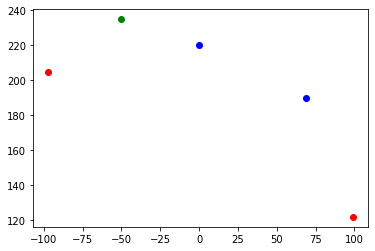

In [865]:
for i in block:
    x = (i.loc)
    plt.plot([round(x[0])], [round(x[1])], 'ro')
for i in pulle:
    x = (i.centre)
    plt.plot([round(x[0])], [round(x[1])], 'bo')
for i in ceiling:
    x = (i.loc)
    plt.plot([round(x[0])], [round(x[1])], 'go')
plt.show()

In [866]:
print(fin_orig)

[ 0.   5.  -2.5  0.   0.   2.5 15.  30.  30. ]


In [867]:
print(block_dick)


{1: {'number': 1, 'mass': 30, 'loc': [-97, 205], 'acceleration': [5.0, 0.0], 'forces': {'y': [0, 't'], 'x': [0, 'r']}, 'initvelocity': [0, 0], 'size': [30, 30], 'angle of incline': -1, 'textloc': -1.0}, 2: {'number': 2, 'mass': 40, 'loc': [99, 122], 'acceleration': [0.0, -2.5], 'forces': {'y': [0, 't'], 'x': [0, 'r']}, 'initvelocity': [0, 0], 'size': [25, 25], 'angle of incline': -1, 'textloc': 1.0}}


In [868]:
print(block_dick_orig)

{1: {'number': 1, 'mass': 30, 'loc': [-97, 205], 'acceleration': [5.0, 0.0], 'forces': {'y': [0, 't'], 'x': [0, 'r']}, 'initvelocity': [0, 0], 'size': [30, 30], 'angle of incline': -1, 'textloc': -1.0}, 2: {'number': 2, 'mass': 40, 'loc': [99, 122], 'acceleration': [0.0, -2.5], 'forces': {'y': [0, 't'], 'x': [0, 'r']}, 'initvelocity': [0, 0], 'size': [25, 25], 'angle of incline': -1, 'textloc': 1.0}}


In [869]:
print(ceiling_dick)

{1: {'position': 'l', 'number': 1, 'loc': [-50.0, 235.0], 'size': 50}}


In [870]:
print(normal_dick)

{1: {'force': [15.0], 'number': 1, 'objects': ['B', 'b1'], 'angle': 1.5707963267948966, 'contains_ground': 1}}


In [871]:
print(temp_matr)

[[-3.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0. -3.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0. -4.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0. -4.  0.  0.  0. -0.  0.]
 [ 0.  0.  0.  0.  0.  0. -0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -2.  1.  0.]
 [-0. -1.  0.  0.  0.  2.  0.  0.  0.]
 [ 0.  0. -1.  0. -0. -1.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [872]:
print(pulley_dick)
for p in pulley_dick:
    if(pulley_dick[p]["bb"]==1):
        temp_matr=np.insert(temp_matr, n_Bb*2+2 * (pulley_dick[p]["number"]-1), np.zeros(n), axis=0)
        temp_matr=np.insert(temp_matr,n_Bb*2+2*(pulley_dick[p]["number"]-1)+1,np.zeros(n),axis=0)
        temp_matr=np.insert(temp_matr, n_Bb*2+2 * (pulley_dick[p]["number"]-1), np.zeros(n+2*n_Bp), axis=1)
        temp_matr=np.insert(temp_matr,n_Bb*2+2*(pulley_dick[p]["number"]-1)+1,np.zeros(n+2*n_Bp),axis=1)

{1: {'number': 1, 'centre': [0, 220], 'radius': 15, 'acceleration': [2.5, 0.0], 'initvelocity': [0, 0], 'forces': [], 'bb': 0, 'textloc': 1.0}, 2: {'number': 2, 'centre': [69.0, 190.0], 'radius': 30, 'acceleration': 0, 'initvelocity': [0, 0], 'forces': [], 'bb': 1, 'textloc': 1.0}}


In [873]:
print(temp_matr)


[[-3.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0. -3.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0. -4.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0. -4.  0.  0.  0.  0.  0. -0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -2.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [-0. -1.  0.  0.  0.  2.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  0. -0. -1.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [874]:
print(string_dick)

{1: {'number': 1, 'first obj': 1, 'first obj type': "<class 'blocksclass.pulleys'>", 'second obj': 1, 'second obj type': "<class 'blocksclass.blocks'>", 'angle': 4.71238898038469, 'str no': 1, 'toc': 'tm'}, 2: {'number': 2, 'first obj': 1, 'first obj type': "<class 'blocksclass.pulleys'>", 'second obj': 1, 'second obj type': "<class 'blocksclass.grounds'>", 'angle': 1.5707963267948966, 'str no': 1, 'toc': 'tm'}, 3: {'number': 3, 'first obj': 1, 'first obj type': "<class 'blocksclass.pulleys'>", 'second obj': 2, 'second obj type': "<class 'blocksclass.pulleys'>", 'angle': 1.5707963267948966, 'str no': 2, 'toc': 'mt'}, 4: {'number': 4, 'first obj': 2, 'first obj type': "<class 'blocksclass.pulleys'>", 'second obj': 2, 'second obj type': "<class 'blocksclass.blocks'>", 'angle': 3.141592653589793, 'str no': 2, 'toc': 'tm'}}


In [875]:
eq_block_list = ["b1", "b2", "b3", "b4", "b5", "b6", "b7", "b8", "b9"]
del eq_block_list[n_b:]

eq_acc_list = ['a\u2081y', 'a\u2081x', 'a\u2082y', 'a\u2082x', 'a\u2083y',
               'a\u2083x', 'a\u2084y', 'a\u2084x', 'a\u2085y', 'a\u2085x', 'a\u2086y', 'a\u2086x']
for i in range(n_b):
    if(block[i].bb!=(-1)):
        eq_acc_list[2*i] = eq_acc_list[2*i][0:2]+'p'
        eq_acc_list[2*i+1] = eq_acc_list[2*i+1][0:2]+'n'
eq_acc_list_copy = ['a\u2081y', 'a\u2081x', 'a\u2082y', 'a\u2082x', 'a\u2083y',
                    'a\u2083x', 'a\u2084y', 'a\u2084x', 'a\u2085y', 'a\u2085x', 'a\u2086y', 'a\u2086x']
eq_acc_idx = 0
eq_acc_idx_copy = 0
no_of_non_moving_obj = 0
eq_count = 0

for blk in block_dick:
    eq_count = (blk-1)*2
    block_acc_list = block_dick[blk]["acceleration"]

    if(abs(block_acc_list[0]) < 0.001 and abs(block_acc_list[1]) < 0.001):
        no_of_non_moving_obj += 1

    else:
        eq_acc_list[eq_acc_idx] = eq_acc_list[eq_acc_idx_copy]
        eq_acc_list[eq_acc_idx+1] = eq_acc_list[eq_acc_idx_copy+1]

        eq_acc_idx_copy += 2

    eq_acc_idx += 2

if (bb.mass > 0):
    eq_count = n_b*2
    bb_acc_list = bigblock_dick["acceleration"]

    if(abs(bb_acc_list[0]) < 0.0001 and abs(bb_acc_list[1]) < 0.0001):
        no_of_non_moving_obj += 1

    else:
        eq_acc_list[eq_acc_idx] = eq_acc_list_copy[eq_acc_idx_copy]
        eq_acc_list[eq_acc_idx+1] = eq_acc_list_copy[eq_acc_idx_copy+1]

        eq_acc_idx_copy += 2

    eq_acc_idx += 2

p_c = 1
print(eq_acc_list)
for pl in pulley_dick:
    if(pulley_dick[pl]["bb"] == 1):
        eq_acc_list[eq_acc_idx] = 0
        eq_acc_list[eq_acc_idx+1] = 0

        eq_acc_idx += 2
        eq_acc_idx_copy += 2
        print(eq_acc_list)
        continue

    eq_count = n_b*2+(p_c-1)*2
    p_c += 1
    pulley_acc_list = pulley_dick[pl]["acceleration"]

    if(abs(pulley_acc_list[0]) < 0.0001 and abs(pulley_acc_list[1]) < 0.0001):
        no_of_non_moving_obj += 1

    else:
        eq_acc_list[eq_acc_idx] = eq_acc_list_copy[eq_acc_idx]
        eq_acc_list[eq_acc_idx+1] = eq_acc_list_copy[eq_acc_idx+1]

        eq_acc_idx_copy += 2

    eq_acc_idx += 2
    print(eq_acc_list)

del eq_acc_list[(n_o+n_Bp)*2:]

eq_tension_list = ['T\u2081', 'T\u2082', 'T\u2083',
                   'T\u2084', 'T\u2085', 'T\u2086', 'T\u2087', 'T\u2088']

del eq_tension_list[act_nos:]

eq_normal_list = ['N\u2081', 'N\u2082', 'N\u2083',
                  'N\u2084', 'N\u2085', 'N\u2086', 'N\u2087', 'N\u2088']

del eq_normal_list[n_n:]

eq_unknown_list = eq_acc_list + eq_tension_list + eq_normal_list

eq_count = 0
actual_eq_count = 0

eq_strings = ["", "", "", "", "", "", "", "", ""]
step_one_print = ["", "", ""]
step_one_question = [
    "How many moving objects are present?", "How many strings are there?", "How many contacting surfaces are there?"]

step_one_correct_option_index = [random.randint(0, 3), random.randint(0, 3), random.randint(0, 3)]
step_one_answer = [0, 0, 0]
step_two_options = []
step_two_correct_option_idx = []

eq_length_dash = ['l\u2081', 'l\u2082', 'l\u2083',
                  'l\u2084', 'l\u2085', 'l\u2086', 'l\u2087', 'l\u2088']

for eq_step_two_option_no in range((n_o+n_Bp)*2):
    step_two_options.append([])
    step_two_correct_option_idx.append(0)

eq_forces = []
eq_forces_options = []
eq_forces_co = []


temp_matr = np.around(temp_matr, decimals=2)

count = 0


['a₁y', 'a₁x', 'a₂y', 'a₂x', 'a₃y', 'a₃x', 'a₄y', 'a₄x', 'a₅y', 'a₅x', 'a₆y', 'a₆x']
['a₁y', 'a₁x', 'a₂y', 'a₂x', 'a₃y', 'a₃x', 'a₄y', 'a₄x', 'a₅y', 'a₅x', 'a₆y', 'a₆x']
['a₁y', 'a₁x', 'a₂y', 'a₂x', 'a₃y', 'a₃x', 0, 0, 'a₅y', 'a₅x', 'a₆y', 'a₆x']


In [876]:
print(n_B)
print(eq_acc_list)

1
['a₁y', 'a₁x', 'a₂y', 'a₂x', 'a₃y', 'a₃x', 0, 0]


Update the QnA

BLK

In [877]:
temp_matr

array([[-3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0., -3.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0., -4.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0., -4.,  0.,  0.,  0.,  0.,  0., -0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -2.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [-0., -1.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0., -1.,  0., -0., -1.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [878]:
for blk in block_dick:
    blk_acc_idx = 0
    eq_no_of_terms = 0
    eq_sign_of_terms = []
    eq_terms = []
    eq_forces.append([])
    eq_forces_co.append([])
    eq_forces_options.append([])
    eq_forces.append([])
    eq_forces_co.append([])
    eq_forces_options.append([])
    axis_dir = []
    acc_dir = []
    for blk_acc in block_dick[blk]["acceleration"]:
        if(abs(blk_acc) < 0.000001):
            block_dick[blk]["acceleration"][blk_acc_idx] = 0
        blk_acc_idx += 1
    n_acc_dir = np.count_nonzero(block_dick[blk]["acceleration"])
    step_one_answer[0] = step_one_answer[0]+((n_acc_dir+1)//2)
    eq_count = (blk-1)*2
    a = np.count_nonzero(temp_matr[eq_count])
    if(mgmatr[eq_count]!=0):
        a+=1
    b = np.count_nonzero(temp_matr[eq_count+1])
    if(mgmatr[eq_count+1] != 0):
        b += 1
    if(n_acc_dir == 2):
        acc_dir = ["x", "y"]
        axis_dir = [1, 0]
        step_one_print[0] = step_one_print[0] + eq_acc_list[2 *
                                                            (blk-1)][0:3] + ", " + eq_acc_list[2*(blk-1)+1][0:3] + ", "

    elif(a > 1 and b > 1):
        if(block_dick[blk]["angle of incline"]==(-1)):
            if(n_acc_dir == 1):
                if(block_dick[blk]["acceleration"][0] == 0):
                    eq_unknown_list[2*(blk-1)+1] = 0
                    eq_unknown_list[2*(blk-1)] = eq_unknown_list[2*(blk-1)][0:2]
                    step_one_print[0] = step_one_print[0] + eq_acc_list[2 *
                                                                        (blk-1)][0:2] + ", "
                else:
                    eq_unknown_list[2*(blk-1)] = 0
                    eq_unknown_list[2*(blk-1) +
                                    1] = eq_unknown_list[2*(blk-1)+1][0:2]
                    step_one_print[0] = step_one_print[0] + eq_acc_list[2*(blk-1)+1][0:2] + ", "
            else:
                eq_unknown_list[2*(blk-1)+1] = 0
                eq_unknown_list[2*(blk-1)] = 0

        else:
            if(n_acc_dir == 1):
                if(block_dick[blk]["acceleration"][0] == 0):
                    eq_unknown_list[2*(blk-1)+1] = 0
                    step_one_print[0] = step_one_print[0] + eq_acc_list[2 *
                                                                        (blk-1)][0:3] + ", "
                else:
                    eq_unknown_list[2*(blk-1)] = 0
                    eq_unknown_list[2*(blk-1) +
                                    1] = eq_unknown_list[2*(blk-1)+1][0:3]
                    step_one_print[0] = step_one_print[0] + \
                        eq_acc_list[2*(blk-1)+1][0:3] + ", "
            else:
                eq_unknown_list[2*(blk-1)+1] = 0
                eq_unknown_list[2*(blk-1)] = 0

        acc_dir = ["x", "y"]
        axis_dir = [1, 0]
        

    elif (a > 1):
        if(block_dick[blk]["angle of incline"] == (-1)):
            eq_acc_list[2*(blk-1)] = eq_acc_list[2*(blk-1)][0:2]
            eq_unknown_list[2*(blk-1)] = eq_unknown_list[2*(blk-1)][0:2]
            step_one_print[0] = step_one_print[0] + \
                eq_acc_list[2*(blk-1)][0:3] + ", "
        else:
            eq_acc_list[2*(blk-1)] = eq_acc_list[2*(blk-1)][0:3]
            eq_unknown_list[2*(blk-1)] = eq_unknown_list[2*(blk-1)][0:3]
            step_one_print[0] = step_one_print[0] + \
                eq_acc_list[2*(blk-1)][0:2] + ", "
        n_acc_dir = 1
        eq_acc_list[2*(blk-1)+1] = 0
        eq_unknown_list[2*(blk-1)+1] = 0
        acc_dir = ["y"]
        axis_dir = [1]

    elif (b > 1):
        if(block_dick[blk]["angle of incline"] == (-1)):
            eq_acc_list[2*(blk-1)+1] = eq_acc_list[2*(blk-1)+1][0:2]
            eq_unknown_list[2*(blk-1)+1] = eq_unknown_list[2*(blk-1)+1][0:2]
            step_one_print[0] = step_one_print[0] + \
                eq_acc_list[2*(blk-1)+1][0:2] + ", "
        else:
            eq_acc_list[2*(blk-1)+1] = eq_acc_list[2*(blk-1)+1][0:3]
            eq_unknown_list[2*(blk-1)+1] = eq_unknown_list[2*(blk-1)+1][0:3]
            step_one_print[0] = step_one_print[0] + \
                eq_acc_list[2*(blk-1)+1][0:3] + ", "
        n_acc_dir = 1
        eq_acc_list[2*(blk-1)] = 0
        eq_unknown_list[2*(blk-1)] = 0
        acc_dir = ["x"]
        axis_dir = [0]
        

    for axis in axis_dir:
        if(axis == 1):
            axis_real = "y"
            eq_count = (blk-1)*2
        else:
            axis_real = "x"
            eq_count = (blk-1)*2+1

        eq_no_of_terms = 0
        eq_sign_of_terms = []
        eq_terms = []

        matr_row = temp_matr[eq_count]
        non_zero_coeffs_idx = np.where(matr_row != 0)[0]

        if(block_dick[blk]["acceleration"][axis] < 0):
            if(block_dick[blk]["angle of incline"]==(-1)):
                if(mgmatr[eq_count] < 0):
                    eq_strings[actual_eq_count] += str(-1*mgmatr[eq_count])
                    eq_terms.append(str(mgmatr[eq_count]))
                    eq_no_of_terms += 1
                    eq_sign_of_terms.append("-")
                elif(mgmatr[eq_count] > 0):
                    eq_strings[actual_eq_count] += str(mgmatr[eq_count])
                    eq_terms.append(str(mgmatr[eq_count]))
                    eq_no_of_terms += 1
                    eq_sign_of_terms.append("+")                    
            else:
                if(mgmatr[eq_count]==int):
                    if(mgmatr[eq_count] < 0):
                        eq_strings[actual_eq_count] += str(-1*mgmatr[eq_count])
                        eq_terms.append(str(mgmatr[eq_count]))
                        eq_no_of_terms += 1
                        eq_sign_of_terms.append("-")
                    if(mgmatr[eq_count] > 0):
                        eq_strings[actual_eq_count] += str(mgmatr[eq_count])
                        eq_terms.append(str(mgmatr[eq_count]))
                        eq_no_of_terms += 1
                        eq_sign_of_terms.append("+")
                        
                elif(mgmatr[eq_count][0] == "-"):
                    eq_strings[actual_eq_count] += mgmatr[eq_count][1:]
                    eq_terms.append(mgmatr[eq_count])
                    eq_no_of_terms += 1
                    eq_sign_of_terms.append("-")
                else:
                    eq_strings[actual_eq_count] += mgmatr[eq_count]
                    eq_terms.append(mgmatr[eq_count])
                    eq_no_of_terms += 1
                    eq_sign_of_terms.append("+")

        eq_force_count = 0
        for nzci in non_zero_coeffs_idx:
            if(nzci != eq_count or len(non_zero_coeffs_idx)==1):
                if(block_dick[blk]["acceleration"][axis] >= 0):
                    this_coeff = int(matr_row[nzci])
                
                    if(this_coeff > 0 and nzci!=eq_count):
                        if(this_coeff == 1):
                            this_coeff = ""
                        eq_strings[actual_eq_count] += "+" + \
                            str(this_coeff) + eq_unknown_list[nzci]
                        eq_terms.append(eq_unknown_list[nzci])
                        eq_no_of_terms += 1
                        eq_sign_of_terms.append("+")
                        eq_forces[2*(blk-1)+1-axis].append("+" +
                                                           eq_unknown_list[nzci])

                        eq_forces_correct_option = random.randint(0, 1)
                        eq_forces_co[2*(blk-1)+1 -
                                     axis].append(eq_forces_correct_option)

                        eq_forces_options[2*(blk-1)+1-axis].append([])
                        eq_forces_options[2*(blk-1)+1 -
                                          axis][eq_force_count].append([])
                        eq_forces_options[2*(blk-1)+1 -
                                          axis][eq_force_count].append([])
                        eq_forces_options[2*(
                            blk-1)+1-axis][eq_force_count][eq_forces_correct_option] = "+" + eq_unknown_list[nzci]
                        eq_forces_options[2*(blk-1)+1-axis][eq_force_count][int(
                            not eq_forces_correct_option)] = "-" + eq_unknown_list[nzci]

                        eq_force_count += 1
                        if(this_coeff == ""):
                            this_coeff = 1
                    if(this_coeff < 0 and eq_count!=nzci):
                        if(this_coeff == -1):
                            this_coeff = "-"
                        eq_strings[actual_eq_count] += str(
                            this_coeff) + eq_unknown_list[nzci]
                        eq_terms.append(eq_unknown_list[nzci])
                        eq_no_of_terms += 1
                        eq_sign_of_terms.append("-")
                        eq_forces[2*(blk-1)+1-axis].append("-" +
                                                           eq_unknown_list[nzci])

                        eq_forces_correct_option = random.randint(0, 1)
                        eq_forces_co[2*(blk-1)+1 -
                                     axis].append(eq_forces_correct_option)

                        eq_forces_options[2*(blk-1)+1-axis].append([])
                        eq_forces_options[2*(blk-1)+1 -
                                          axis][eq_force_count].append([])
                        eq_forces_options[2*(blk-1)+1 -
                                          axis][eq_force_count].append([])
                        eq_forces_options[2*(
                            blk-1)+1-axis][eq_force_count][eq_forces_correct_option] = "-" + eq_unknown_list[nzci]
                        eq_forces_options[2*(blk-1)+1-axis][eq_force_count][int(
                            not eq_forces_correct_option)] = "+" + eq_unknown_list[nzci]
                        eq_force_count += 1

                if(block_dick[blk]["acceleration"][axis] < 0 and eq_count!=nzci):
                    this_coeff = int(matr_row[nzci])
                    if(this_coeff > 0):
                        if(this_coeff == 1):
                            this_coeff = ""
                        if(fin[eq_count]==0):
                            eq_strings[actual_eq_count] += "-" + str(this_coeff) + eq_unknown_list[nzci] + "=0" 
                        else:
                            eq_strings[actual_eq_count] += "-" + str(this_coeff) + eq_unknown_list[nzci] + "=" + str(
                                int(abs(matr_row[eq_count]))) + eq_acc_list[eq_count]
                        eq_terms.append(eq_unknown_list[nzci])
                        eq_no_of_terms += 1
                        eq_sign_of_terms.append("-")
                        eq_forces[2*(blk-1)+1-axis].append("+" +
                                                           eq_unknown_list[nzci])

                        eq_forces_correct_option = random.randint(0, 1)
                        eq_forces_co[2*(blk-1)+1 -
                                     axis].append(eq_forces_correct_option)

                        eq_forces_options[2*(blk-1)+1-axis].append([])
                        eq_forces_options[2*(blk-1)+1 -
                                          axis][eq_force_count].append([])
                        eq_forces_options[2*(blk-1)+1 -
                                          axis][eq_force_count].append([])
                        eq_forces_options[2*(
                            blk-1)+1-axis][eq_force_count][eq_forces_correct_option] = "+" + eq_unknown_list[nzci]
                        eq_forces_options[2*(blk-1)+1-axis][eq_force_count][int(
                            not eq_forces_correct_option)] = "-" + eq_unknown_list[nzci]
                        eq_force_count += 1
                        if(this_coeff == ""):
                            this_coeff = 1
                    if(this_coeff < 0):
                        if(this_coeff == -1):
                            this_coeff = "+"
                        if(fin[eq_count] == 0):
                            eq_strings[actual_eq_count] += str(this_coeff) + eq_unknown_list[nzci] + "=0"
                        else:
                            eq_strings[actual_eq_count] += str(this_coeff) + eq_unknown_list[nzci] + "=" + str(
                                int(abs(matr_row[eq_count]))) + eq_acc_list[eq_count][:-3+(len(acc_dir))]
                        eq_terms.append(eq_unknown_list[nzci])
                        eq_no_of_terms += 1
                        eq_sign_of_terms.append("+")
                        eq_forces[2*(blk-1)+1-axis].append("-" +
                                                           eq_unknown_list[nzci])
                        eq_forces_correct_option = random.randint(0, 1)
                        eq_forces_co[2*(blk-1)+1 -
                                     axis].append(eq_forces_correct_option)

                        eq_forces_options[2*(blk-1)+1-axis].append([])
                        eq_forces_options[2*(blk-1)+1 -
                                          axis][eq_force_count].append([])
                        eq_forces_options[2*(blk-1)+1 -
                                          axis][eq_force_count].append([])
                        eq_forces_options[2*(
                            blk-1)+1-axis][eq_force_count][eq_forces_correct_option] = "-" + eq_unknown_list[nzci]
                        eq_forces_options[2*(blk-1)+1-axis][eq_force_count][int(
                            not eq_forces_correct_option)] = "+" + eq_unknown_list[nzci]
                        eq_force_count += 1
                
                if(nzci == eq_count):
                    eq_strings[actual_eq_count] += "=" + str(int(abs(matr_row[eq_count]))) + eq_acc_list[eq_count]

        if(block_dick[blk]["acceleration"][axis] >= 0):
            if(block_dick[blk]["angle of incline"]==(-1)):
                if(mgmatr[eq_count] < 0):
                    if(fin[eq_count] == 0):
                        eq_strings[actual_eq_count] += "+" + str(-1*mgmatr[eq_count]) + "=0" 
                    else:
                        eq_strings[actual_eq_count] += "+" + str(-1*mgmatr[eq_count]) + "=" + str(
                            abs(matr_row[eq_count])) + eq_acc_list[eq_count]
                    eq_terms.append(str(-1*mgmatr[eq_count]))
                    eq_no_of_terms += 1
                    eq_sign_of_terms.append("+")
                elif(mgmatr[eq_count] > 0):
                    if(fin[eq_count] == 0):
                        eq_strings[actual_eq_count] += "-" + str(mgmatr[eq_count]) + "=0" 
                    else:
                        eq_strings[actual_eq_count] += "-" + str(mgmatr[eq_count]) + "=" + str(
                            abs(matr_row[eq_count])) + eq_acc_list[eq_count]
                    eq_terms.append(str(mgmatr[eq_count]))
                    eq_no_of_terms += 1
                    eq_sign_of_terms.append("-")
                else:
                    if(fin[eq_count] == 0):
                        eq_strings[actual_eq_count] += "=0"
                    else:
                        eq_strings[actual_eq_count] += "=" + str(
                            abs(matr_row[eq_count])) + eq_acc_list[eq_count]
            else:
                if(mgmatr[eq_count] == int):
                    if(mgmatr[eq_count] < 0):
                        if(fin[eq_count] == 0):
                            eq_strings[actual_eq_count] += "+" + str(-1*mgmatr[eq_count]) + "=0"
                        else:
                            eq_strings[actual_eq_count] += "+" + str(-1*mgmatr[eq_count]) + "=" + str(
                                abs(matr_row[eq_count])) + eq_acc_list[eq_count]
                        eq_terms.append(str(-1*mgmatr[eq_count]))
                        eq_no_of_terms += 1
                        eq_sign_of_terms.append("+")
                    elif(mgmatr[eq_count] > 0):
                        if(fin[eq_count] == 0):
                            eq_strings[actual_eq_count] += "-" + str(mgmatr[eq_count]) + "=0"
                        else:
                            eq_strings[actual_eq_count] += "-" + str(mgmatr[eq_count]) + "=" + str(
                                abs(matr_row[eq_count])) + eq_acc_list[eq_count]
                        eq_terms.append(str(mgmatr[eq_count]))
                        eq_no_of_terms += 1
                        eq_sign_of_terms.append("-")
                    else:
                        if(fin[eq_count] == 0):
                            eq_strings[actual_eq_count] += "=0"
                        else:
                            eq_strings[actual_eq_count] += "=" + str(
                                abs(matr_row[eq_count])) + eq_acc_list[eq_count]
                elif(mgmatr[eq_count][0] == "-"):
                    if(fin[eq_count] == 0):
                        eq_strings[actual_eq_count] += "+" + mgmatr[eq_count][1:] + "=0"
                    else:
                        eq_strings[actual_eq_count] += "+" + mgmatr[eq_count][1:] + "=" + str(
                            abs(matr_row[eq_count])) + eq_acc_list[eq_count]
                    eq_terms.append(mgmatr[eq_count][1:])
                    eq_no_of_terms += 1
                    eq_sign_of_terms.append("+")
                else:
                    if(fin[eq_count] == 0):
                        eq_strings[actual_eq_count] += "-" + mgmatr[eq_count] + "=0" 
                    else:
                        eq_strings[actual_eq_count] += "-" + mgmatr[eq_count] + "=" + str(
                            abs(matr_row[eq_count])) + eq_acc_list[eq_count]
                    eq_terms.append(mgmatr[eq_count])
                    eq_no_of_terms += 1
                    eq_sign_of_terms.append("-")

        if(len(eq_sign_of_terms)!=1):
            eq_sign_ch_idx_options = random.sample(
                range(0, len(eq_sign_of_terms)), 2)

            eq_sign_ch_idx_options.sort()

            eq_sign_no = 0
            for eq_signs in [["+", "+"], ["+", "-"], ["-", "+"], ["-", "-"]]:
                stwo = ""
                if(eq_signs == [eq_sign_of_terms[eq_sign_ch_idx_options[0]], eq_sign_of_terms[eq_sign_ch_idx_options[1]]]):
                    step_two_correct_option_idx[2*(blk-1)+1-axis] = eq_sign_no

                eq_term_idx = 0
                eq_term_count = 0
                for eq_each_term in eq_terms:

                    if(eq_term_count in eq_sign_ch_idx_options):
                        stwo += eq_signs[eq_term_idx] + eq_terms[eq_term_count]
                        eq_term_idx += 1
                    else:
                        stwo += eq_sign_of_terms[eq_term_count] + \
                            eq_terms[eq_term_count]

                    eq_term_count += 1
                if(fin[eq_count] == 0):
                    step_two_options[2*(blk-1)+1-axis].append(stwo + "=0")
                else:
                    step_two_options[2*(blk-1)+1-axis].append(stwo + "=" +
                                                              str(abs(matr_row[eq_count])) + eq_acc_list[eq_count])
                eq_sign_no += 1

            eq_newc_idx = random.randint(0, 3)
            eq_op_temp = step_two_options[2*(blk-1)+1-axis][eq_newc_idx]
            step_two_options[2*(blk-1)+1-axis][eq_newc_idx] = step_two_options[2 *
                                                                            (blk-1)+1-axis][step_two_correct_option_idx[2*(blk-1)+1-axis]]
            step_two_options[2*(blk-1)+1-axis][step_two_correct_option_idx[2 *
                                                                        (blk-1)+1-axis]] = eq_op_temp
            step_two_correct_option_idx[2*(blk-1)+1-axis] = eq_newc_idx
        else:
            if(eq_strings[actual_eq_count][0]=="-"):
                step_two_options[2*(blk-1)+1-axis].append(eq_strings[actual_eq_count])
                step_two_options[2*(blk-1)+1-axis].append(eq_strings[actual_eq_count][1:])
                step_two_correct_option_idx[2*(blk-1)+1-axis]=0
            else:
                step_two_options[2*(blk-1)+1-axis].append(eq_strings[actual_eq_count])
                step_two_options[2*(blk-1)+1-axis].append("-"+eq_strings[actual_eq_count][1:])
                step_two_correct_option_idx[2*(blk-1)+1-axis]=0

        actual_eq_count = actual_eq_count + 1

In [879]:
block_dick

{1: {'number': 1,
  'mass': 30,
  'loc': [-97, 205],
  'acceleration': [5.0, 0],
  'forces': {'y': [0, 't'], 'x': [0, 'r']},
  'initvelocity': [0, 0],
  'size': [30, 30],
  'angle of incline': -1,
  'textloc': -1.0},
 2: {'number': 2,
  'mass': 40,
  'loc': [99, 122],
  'acceleration': [0, -2.5],
  'forces': {'y': [0, 't'], 'x': [0, 'r']},
  'initvelocity': [0, 0],
  'size': [25, 25],
  'angle of incline': -1,
  'textloc': 1.0}}

Bigblock

In [880]:
if (bb.mass > 0):
    w_y = (bb.mass)*10
    print(str(w_y*axis))
    bb_acc_idx = 0
    eq_no_of_terms = 0
    eq_sign_of_terms = []
    eq_terms = []
    eq_forces.append([])
    eq_forces_co.append([])
    eq_forces_options.append([])
    eq_forces.append([])
    eq_forces_co.append([])
    eq_forces_options.append([])
    axis_dir = []
    acc_dir = []
    for bb_acc in bigblock_dick["acceleration"]:
        if(abs(bb_acc) < 0.000001):
            bigblock_dick["acceleration"][bb_acc_idx] = 0
        bb_acc_idx += 1
    n_acc_dir = np.count_nonzero(bigblock_dick["acceleration"])
    step_one_answer[0] = step_one_answer[0]+((n_acc_dir+1)//2)
    eq_count = n_b*2

    if(n_acc_dir == 2):
        acc_dir = ["x", "y"]
        axis_dir = [1, 0]
        step_one_print[0] = step_one_print[0] + eq_acc_list[2 *
                                                            (n_b)][0:3] + ", " + eq_acc_list[2*(n_b)+1][0:3] + ", "

    elif(np.count_nonzero(temp_matr[eq_count]) > 1 and np.count_nonzero(temp_matr[eq_count+1]) > 1):
        if(n_acc_dir == 1):
            if(block_dick[blk]["acceleration"][0] == 0):
                eq_unknown_list[2*(n_b)+1] = 0
                eq_unknown_list[2*(n_b)] = eq_unknown_list[2*(n_b)][0:2]
            else:
                eq_unknown_list[2*(n_b)] = 0
                eq_unknown_list[2*(n_b)+1] = eq_unknown_list[2*(n_b)+1][0:2]
        else:
            eq_unknown_list[2*(n_b)+1] = 0
            eq_unknown_list[2*(n_b)] = 0
        acc_dir = ["x", "y"]
        axis_dir = [1, 0]
        step_one_print[0] = step_one_print[0] + eq_acc_list[2 *
                                                            (n_b)][0:3] + ", " + eq_acc_list[2*(n_b)+1][0:3] + ", "

    elif (np.count_nonzero(temp_matr[eq_count]) > 1):
        n_acc_dir = 1
        eq_acc_list[2*(n_b)] = eq_acc_list[2*(n_b)][0:2]
        eq_unknown_list[2*(n_b)] = eq_unknown_list[2*(n_b)][0:2]
        eq_unknown_list[2*(n_b)+1] = 0
        acc_dir = ["y"]
        axis_dir = [1]
        step_one_print[0] = step_one_print[0] + \
            eq_acc_list[2*(n_b)][0:2] + ", "

    elif (np.count_nonzero(temp_matr[eq_count+1]) > 1):
        n_acc_dir = 1
        eq_acc_list[2*(n_b)+1] = eq_acc_list[2*(n_b)+1][0:2]
        eq_unknown_list[2*(n_b)+1] = eq_unknown_list[2*(n_b)+1][0:2]
        eq_unknown_list[2*(n_b)] = 0
        acc_dir = ["x"]
        axis_dir = [0]
        step_one_print[0] = step_one_print[0] + \
            eq_acc_list[2*(n_b)+1][0:2] + ", "

    for axis in axis_dir:
        if(axis == 1):
            axis_real = "y"
            eq_count = (n_b)*2
        else:
            axis_real = "x"
            eq_count = (n_b)*2+1
        print(axis)
        eq_no_of_terms = 0
        eq_sign_of_terms = []
        eq_terms = []

        matr_row = temp_matr[eq_count]

        non_zero_coeffs_idx = np.where(matr_row != 0)[0]

        if(bigblock_dick["acceleration"][axis] < 0):
            eq_strings[actual_eq_count] += str(w_y*axis)
            eq_terms.append(str(w_y*axis))
            eq_no_of_terms += 1
            eq_sign_of_terms.append("+")

        eq_force_count = 0
        for nzci in non_zero_coeffs_idx:
            if(nzci != eq_count):
                if(bigblock_dick["acceleration"][axis] >= 0):
                    this_coeff = int(matr_row[nzci])

                    if(this_coeff > 0):
                        if(this_coeff == 1):
                            this_coeff = ""
                        eq_strings[actual_eq_count] += "+" + \
                            str(this_coeff) + eq_unknown_list[nzci]
                        eq_terms.append(eq_unknown_list[nzci])
                        eq_no_of_terms += 1
                        eq_sign_of_terms.append("+")
                        eq_forces[2*(n_b)+1-axis].append("+" +
                                                         eq_unknown_list[nzci])

                        eq_forces_correct_option = random.randint(0, 1)
                        eq_forces_co[2*(n_b)+1 -
                                     axis].append(eq_forces_correct_option)

                        eq_forces_options[2*(n_b)+1-axis].append([])
                        eq_forces_options[2*(n_b)+1 -
                                          axis][eq_force_count].append([])
                        eq_forces_options[2*(n_b)+1 -
                                          axis][eq_force_count].append([])
                        eq_forces_options[2*(
                            n_b)+1-axis][eq_force_count][eq_forces_correct_option] = "+" + eq_unknown_list[nzci]
                        eq_forces_options[2*(n_b)+1-axis][eq_force_count][int(
                            not eq_forces_correct_option)] = "-" + eq_unknown_list[nzci]

                        eq_force_count += 1
                        if(this_coeff == ""):
                            this_coeff = 1
                    if(this_coeff < 0):
                        if(this_coeff == -1):
                            this_coeff = "-"
                        eq_strings[actual_eq_count] += str(
                            this_coeff) + eq_unknown_list[nzci]
                        eq_terms.append(eq_unknown_list[nzci])
                        eq_no_of_terms += 1
                        eq_sign_of_terms.append("-")
                        eq_forces[2*(n_b)+1-axis].append("-" +
                                                         eq_unknown_list[nzci])
                        eq_forces_correct_option = random.randint(0, 1)
                        eq_forces_co[2*(n_b)+1 -
                                     axis].append(eq_forces_correct_option)

                        eq_forces_options[2*(n_b)+1-axis].append([])
                        eq_forces_options[2*(n_b)+1 -
                                          axis][eq_force_count].append([])
                        eq_forces_options[2*(n_b)+1 -
                                          axis][eq_force_count].append([])
                        eq_forces_options[2*(
                            n_b)+1-axis][eq_force_count][eq_forces_correct_option] = "-" + eq_unknown_list[nzci]
                        eq_forces_options[2*(n_b)+1-axis][eq_force_count][int(
                            not eq_forces_correct_option)] = "+" + eq_unknown_list[nzci]
                        eq_force_count += 1

                if(bigblock_dick["acceleration"][axis] < 0):
                    this_coeff = int(matr_row[nzci])

                    if(this_coeff > 0):
                        if(this_coeff == 1):
                            this_coeff = ""
                        if(fin[eq_count]==0):
                            eq_strings[actual_eq_count] += "-" + str(this_coeff) + eq_unknown_list[nzci] + "=0"
                        else:
                            eq_strings[actual_eq_count] += "-" + str(this_coeff) + eq_unknown_list[nzci] + "=" + str(
                                int(abs(matr_row[eq_count]))) + eq_acc_list[eq_count]
                        eq_terms.append(eq_unknown_list[nzci])
                        eq_no_of_terms += 1
                        eq_sign_of_terms.append("-")
                        eq_forces[2*(n_b)+1-axis].append("+" +
                                                         eq_unknown_list[nzci])
                        eq_forces_correct_option = random.randint(0, 1)
                        eq_forces_co[2*(n_b)+1 -
                                     axis].append(eq_forces_correct_option)

                        eq_forces_options[2*(n_b)+1-axis].append([])
                        eq_forces_options[2*(n_b)+1 -
                                          axis][eq_force_count].append([])
                        eq_forces_options[2*(n_b)+1 -
                                          axis][eq_force_count].append([])
                        eq_forces_options[2*(
                            n_b)+1-axis][eq_force_count][eq_forces_correct_option] = "+" + eq_unknown_list[nzci]
                        eq_forces_options[2*(n_b)+1-axis][eq_force_count][int(
                            not eq_forces_correct_option)] = "-" + eq_unknown_list[nzci]
                        eq_force_count += 1
                        if(this_coeff == ""):
                            this_coeff = 1
                    if(this_coeff < 0):
                        if(this_coeff == -1):
                            this_coeff = "+"
                        if(fin[eq_count]==0):
                            eq_strings[actual_eq_count] += str(this_coeff) + eq_unknown_list[nzci] + "=0"
                        else:
                            eq_strings[actual_eq_count] += str(this_coeff) + eq_unknown_list[nzci] + "=" + str(
                                int(abs(matr_row[eq_count]))) + eq_acc_list[eq_count][:-3+(len(acc_dir))]
                        eq_terms.append(eq_unknown_list[nzci])
                        eq_no_of_terms += 1
                        eq_sign_of_terms.append("+")
                        eq_forces[2*(n_b)+1-axis].append("-" +
                                                         eq_unknown_list[nzci])
                        eq_forces_correct_option = random.randint(0, 1)
                        eq_forces_co[2*(n_b)+1 -
                                     axis].append(eq_forces_correct_option)

                        eq_forces_options[2*(n_b)+1-axis].append([])
                        eq_forces_options[2*(n_b)+1 -
                                          axis][eq_force_count].append([])
                        eq_forces_options[2*(n_b)+1 -
                                          axis][eq_force_count].append([])
                        eq_forces_options[2*(
                            n_b)+1-axis][eq_force_count][eq_forces_correct_option] = "-" + eq_unknown_list[nzci]
                        eq_forces_options[2*(n_b)+1-axis][eq_force_count][int(
                            not eq_forces_correct_option)] = "+" + eq_unknown_list[nzci]
                        eq_force_count += 1

        if(bigblock_dick["acceleration"][axis] >= 0):
            if(fin[eq_count]==0):
                eq_strings[actual_eq_count] += "-" + str(w_y*axis) + "=0"
            else:
                eq_strings[actual_eq_count] += "-" + str(w_y*axis) + "=" + str(
                    abs(matr_row[eq_count])) + eq_acc_list[eq_count]
            eq_terms.append(w_y*axis)
            eq_no_of_terms += 1
            eq_sign_of_terms.append("-")

        eq_sign_ch_idx_options = random.sample(
            range(0, len(eq_sign_of_terms)), 2)

        eq_sign_ch_idx_options.sort()

        eq_sign_no = 0
        for eq_signs in [["+", "+"], ["+", "-"], ["-", "+"], ["-", "-"]]:
            stwo = ""
            if(eq_signs == [eq_sign_of_terms[eq_sign_ch_idx_options[0]], eq_sign_of_terms[eq_sign_ch_idx_options[1]]]):
                step_two_correct_option_idx[2*(n_b)+1-axis] = eq_sign_no

            eq_term_idx = 0
            eq_term_count = 0
            for eq_each_term in eq_terms:

                if(eq_term_count in eq_sign_ch_idx_options):
                    stwo += eq_signs[eq_term_idx] + \
                        str(eq_terms[eq_term_count])
                    eq_term_idx += 1
                else:
                    stwo += eq_sign_of_terms[eq_term_count] + \
                        str(eq_terms[eq_term_count])

                eq_term_count += 1
            if(fin[eq_count]==0):
                step_two_options[2*(n_b)+1-axis].append(stwo + "=0")
            else:
                step_two_options[2*(n_b)+1-axis].append(stwo + "=" +
                                                        str(abs(matr_row[eq_count])) + eq_acc_list[eq_count])
            eq_sign_no += 1

        eq_newc_idx = random.randint(0, 3)
        eq_op_temp = step_two_options[2*(n_b)+1-axis][eq_newc_idx]
        step_two_options[2*(n_b)+1-axis][eq_newc_idx] = step_two_options[2 *
                                                                         (n_b)+1-axis][step_two_correct_option_idx[2*(n_b)+1-axis]]
        step_two_options[2*(n_b)+1-axis][step_two_correct_option_idx[2 *
                                                                     (n_b)+1-axis]] = eq_op_temp
        step_two_correct_option_idx[2*(n_b)+1-axis] = eq_newc_idx

        actual_eq_count = actual_eq_count + 1


In [881]:
temp_matr

array([[-3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0., -3.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0., -4.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0., -4.,  0.,  0.,  0.,  0.,  0., -0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -2.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [-0., -1.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0., -1.,  0., -0., -1.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

PULLEY

In [882]:
step_one_answer


[2, 0, 0]

In [883]:
pl = 0
for p_c in pulley_dick:
    print(p_c)
    eq_forces.append([])
    eq_forces_co.append([])
    eq_forces_options.append([])
    eq_forces.append([])
    eq_forces_co.append([])
    eq_forces_options.append([])
    pl += 1
    if(pulley_dick[p_c]["bb"] == 1):
        continue
    pl_acc_idx = 0
    eq_no_of_terms = 0
    eq_sign_of_terms = []
    eq_terms = []
    
    axis_dir = []
    acc_dir = []
    pl=p_c
    eq_count = n_Bb*2+(pl-1)*2
    print(pulley_dick[p_c]["acceleration"])
    for pl_acc in pulley_dick[p_c]["acceleration"]:
        if(abs(pl_acc) < 0.000001):
            pulley_dick[p_c]["acceleration"][pl_acc_idx] = 0
        pl_acc_idx += 1

    n_acc_dir = np.count_nonzero(pulley_dick[p_c]["acceleration"])
    print(n_acc_dir)
    step_one_answer[0] = step_one_answer[0]+((n_acc_dir+1)//2)

    if(np.count_nonzero(temp_matr[eq_count]) > 1):
        if(n_acc_dir != 0):
            step_one_print[0] = step_one_print[0] + eq_acc_list[2*n_Bb+2*(pl-1)+1][0:2] + ", "
            eq_acc_list[2*n_Bb+2*(pl-1)] = eq_acc_list[2*n_b+2*(pl-1)][0:2]
        else:
            eq_acc_list[2*n_Bb+2*(pl-1)] = 0
        eq_unknown_list[2*n_Bb+2 * (pl-1)] = eq_unknown_list[2*n_b+2*(pl-1)][0:2]
        eq_unknown_list[2*n_Bb+2*(pl-1)+1] = 0
        eq_acc_list[2*n_Bb+2*(pl-1)+1] = 0
        n_acc_dir = 1
        acc_dir = ["y"]
        axis_dir = [1]

    elif (np.count_nonzero(temp_matr[eq_count+1]) > 1):
        if(n_acc_dir != 0):
            step_one_print[0] = step_one_print[0] + eq_acc_list[2*n_Bb+2*(pl-1)][0:2] + ", "
            eq_acc_list[2*n_Bb+2*(pl-1)+1] = eq_acc_list[2*n_b+2*(pl-1)+1][0:2]
        else:
            eq_acc_list[2*n_Bb+2*(pl-1)+1] = 0
        eq_unknown_list[2*n_Bb+2 * (pl-1)+1] = eq_unknown_list[2*n_b+2*(pl-1)+1][0:2]
        eq_unknown_list[2*n_Bb+2*(pl-1)] = 0
        eq_acc_list[2*n_Bb+2*(pl-1)] = 0
        n_acc_dir = 1
        acc_dir = ["x"]
        axis_dir = [0]
    print(axis_dir)
    for axis in axis_dir:  # 0 is for x and 1 is for y
        if(axis == 1):
            axis_real = "y"
            eq_count = n_Bb*2+(pl-1)*2  # 0 is for x and 1 is for y
        else:
            axis_real = "x"
            eq_count = n_Bb*2+(pl-1)*2+1

        matr_row = temp_matr[eq_count]
        #print( eq_count )
        non_zero_coeffs_idx = np.where(matr_row != 0)[0]

        eq_force_count = 0
        for nzci in non_zero_coeffs_idx:
            if(nzci != eq_count):
                if(pulley_dick[p_c]["acceleration"][axis] > 0):
                    this_coeff = int(matr_row[nzci])
                    if(this_coeff > 0):
                        if(this_coeff == 1):
                            this_coeff = ""
                            eq_forces[2*n_Bb + 2*pl - 1 -
                                      axis].append("+" + eq_unknown_list[nzci])
                            eq_forces_correct_option = random.randint(0, 1)
                            eq_forces_co[2*n_Bb + 2*pl - 1 -
                                         axis].append(eq_forces_correct_option)
                            eq_forces_options[2*n_Bb + 2*pl - 1 - axis].append([])
                            eq_forces_options[2*n_Bb + 2*pl - 1 -
                                              axis][eq_force_count].append([])
                            eq_forces_options[2*n_Bb + 2*pl - 1 -
                                              axis][eq_force_count].append([])
                            eq_forces_options[2*n_Bb + 2*pl - 1 -
                                              axis][eq_force_count][eq_forces_correct_option] = "+" + eq_unknown_list[nzci]
                            eq_forces_options[2*n_Bb + 2*pl - 1 - axis][eq_force_count][int(
                                not eq_forces_correct_option)] = "-" + eq_unknown_list[nzci]
                            eq_force_count += 1
                        else:
                            if(this_coeff == 2):
                                this_coeff = "2"
                                eq_forces[2*n_Bb + 2*pl - 1 -
                                          axis].append("+" + eq_unknown_list[nzci])
                                eq_forces_correct_option = random.randint(0, 1)
                                eq_forces_co[2*n_Bb + 2*pl - 1 -
                                             axis].append(eq_forces_correct_option)
                                eq_forces_options[2*n_Bb +
                                                  2*pl - 1 - axis].append([])
                                eq_forces_options[2*n_Bb + 2*pl - 1 -
                                                  axis][eq_force_count].append([])
                                eq_forces_options[2*n_Bb + 2*pl - 1 -
                                                  axis][eq_force_count].append([])
                                eq_forces_options[2*n_Bb + 2*pl - 1 -
                                                  axis][eq_force_count][eq_forces_correct_option] = "+" + eq_unknown_list[nzci]
                                eq_forces_options[2*n_Bb + 2*pl - 1 - axis][eq_force_count][int(
                                    not eq_forces_correct_option)] = "-" + eq_unknown_list[nzci]
                                eq_force_count += 1
                                eq_forces[2*n_Bb + 2*pl - 1 -
                                          axis].append("+" + eq_unknown_list[nzci])
                                eq_forces_correct_option = random.randint(0, 1)
                                eq_forces_co[2*n_Bb + 2*pl - 1 -
                                             axis].append(eq_forces_correct_option)
                                eq_forces_options[2*n_Bb +
                                                  2*pl - 1 - axis].append([])
                                eq_forces_options[2*n_Bb + 2*pl - 1 -
                                                  axis][eq_force_count].append([])
                                eq_forces_options[2*n_Bb + 2*pl - 1 -
                                                  axis][eq_force_count].append([])
                                eq_forces_options[2*n_Bb + 2*pl - 1 -
                                                  axis][eq_force_count][eq_forces_correct_option] = "+" + eq_unknown_list[nzci]
                                eq_forces_options[2*n_Bb + 2*pl - 1 - axis][eq_force_count][int(
                                    not eq_forces_correct_option)] = "-" + eq_unknown_list[nzci]
                                eq_force_count += 1
                        eq_strings[actual_eq_count] += "+" + \
                            str(this_coeff) + eq_unknown_list[nzci]

                        eq_terms.append(str(this_coeff) +
                                        eq_unknown_list[nzci])

                        eq_no_of_terms += 1
                        eq_sign_of_terms.append("+")

                        if(this_coeff == ""):
                            this_coeff = 1
                        else:
                            if(this_coeff == "2"):
                                this_coeff = 2
                    if(this_coeff < 0):
                        if(this_coeff == -1):
                            this_coeff = "-"
                            eq_forces[2*n_Bb + 2*pl - 1 -
                                      axis].append("-" + eq_unknown_list[nzci])
                            eq_forces_correct_option = random.randint(0, 1)
                            eq_forces_co[2*n_Bb + 2*pl - 1 -
                                         axis].append(eq_forces_correct_option)
                            eq_forces_options[2*n_Bb + 2 *
                                              pl - 1 - axis].append([])
                            eq_forces_options[2*n_Bb + 2*pl - 1 -
                                              axis][eq_force_count].append([])
                            eq_forces_options[2*n_Bb + 2*pl - 1 -
                                              axis][eq_force_count].append([])
                            eq_forces_options[2*n_Bb + 2*pl - 1 -
                                              axis][eq_force_count][eq_forces_correct_option] = "-" + eq_unknown_list[nzci]
                            eq_forces_options[2*n_Bb + 2*pl - 1 - axis][eq_force_count][int(
                                not eq_forces_correct_option)] = "+" + eq_unknown_list[nzci]
                            eq_force_count += 1
                        else:
                            if(this_coeff == -2):
                                this_coeff = "-2"
                                eq_forces[2*n_Bb + 2*pl - 1 -
                                          axis].append("-" + eq_unknown_list[nzci])
                                eq_forces_correct_option = random.randint(0, 1)
                                eq_forces_co[2*n_Bb + 2*pl - 1 -
                                             axis].append(eq_forces_correct_option)
                                eq_forces_options[2*n_Bb +
                                                  2*pl - 1 - axis].append([])
                                eq_forces_options[2*n_Bb + 2*pl - 1 -
                                                  axis][eq_force_count].append([])
                                eq_forces_options[2*n_Bb + 2*pl - 1 -
                                                  axis][eq_force_count].append([])
                                eq_forces_options[2*n_Bb + 2*pl - 1 -
                                                  axis][eq_force_count][eq_forces_correct_option] = "-" + eq_unknown_list[nzci]
                                eq_forces_options[2*n_Bb + 2*pl - 1 - axis][eq_force_count][int(
                                    not eq_forces_correct_option)] = "+" + eq_unknown_list[nzci]
                                eq_force_count += 1
                                eq_forces[2*n_Bb + 2*pl - 1 -
                                          axis].append("-" + eq_unknown_list[nzci])
                                eq_forces_correct_option = random.randint(0, 1)
                                eq_forces_co[2*n_Bb + 2*pl - 1 -
                                             axis].append(eq_forces_correct_option)
                                eq_forces_options[2*n_Bb +
                                                  2*pl - 1 - axis].append([])
                                eq_forces_options[2*n_Bb + 2*pl - 1 -
                                                  axis][eq_force_count].append([])
                                eq_forces_options[2*n_Bb + 2*pl - 1 -
                                                  axis][eq_force_count].append([])
                                eq_forces_options[2*n_Bb + 2*pl - 1 -
                                                  axis][eq_force_count][eq_forces_correct_option] = "-" + eq_unknown_list[nzci]
                                eq_forces_options[2*n_Bb + 2*pl - 1 - axis][eq_force_count][int(
                                    not eq_forces_correct_option)] = "+" + eq_unknown_list[nzci]
                                eq_force_count += 1
                        eq_strings[actual_eq_count] += str(
                            this_coeff) + eq_unknown_list[nzci]
                        eq_terms.append(
                            str(this_coeff[1:]) + eq_unknown_list[nzci])
                        eq_no_of_terms += 1
                        eq_sign_of_terms.append("-")

                        #print( str( this_coeff ) + eq_unknown_list[ nzci ] + "-" + str( mgmatr[ eq_count ] ) + "=" + str(int(abs(matr_row[eq_count]))) + eq_acc_list[eq_count][0:2] )

                if(pulley_dick[p_c]["acceleration"][axis] <= 0):
                    this_coeff = int(matr_row[nzci])

                    if(this_coeff > 0):
                        if(this_coeff == 1):
                            this_coeff = ""
                            eq_forces[2*n_Bb + 2*pl - 1 -
                                      axis].append("+" + eq_unknown_list[nzci])
                            eq_forces_correct_option = random.randint(0, 1)
                            eq_forces_co[2*n_Bb + 2*pl - 1 -
                                         axis].append(eq_forces_correct_option)
                            eq_forces_options[2*n_Bb + 2 *
                                              pl - 1 - axis].append([])
                            eq_forces_options[2*n_Bb + 2*pl - 1 -
                                              axis][eq_force_count].append([])
                            eq_forces_options[2*n_Bb + 2*pl - 1 -
                                              axis][eq_force_count].append([])
                            eq_forces_options[2*n_Bb + 2*pl - 1 -
                                              axis][eq_force_count][eq_forces_correct_option] = "+" + eq_unknown_list[nzci]
                            eq_forces_options[2*n_Bb + 2*pl - 1 - axis][eq_force_count][int(
                                not eq_forces_correct_option)] = "-" + eq_unknown_list[nzci]
                            eq_force_count += 1
                        else:
                            if(this_coeff == 2):
                                this_coeff = "2"
                                eq_forces[2*n_Bb + 2*pl - 1 -
                                          axis].append("+" + eq_unknown_list[nzci])
                                eq_forces_correct_option = random.randint(0, 1)
                                eq_forces_co[2*n_Bb + 2*pl - 1 -
                                             axis].append(eq_forces_correct_option)
                                eq_forces_options[2*n_Bb +
                                                  2*pl - 1 - axis].append([])
                                eq_forces_options[2*n_Bb + 2*pl - 1 -
                                                  axis][eq_force_count].append([])
                                eq_forces_options[2*n_Bb + 2*pl - 1 -
                                                  axis][eq_force_count].append([])
                                eq_forces_options[2*n_Bb + 2*pl - 1 -
                                                  axis][eq_force_count][eq_forces_correct_option] = "+" + eq_unknown_list[nzci]
                                eq_forces_options[2*n_Bb + 2*pl - 1 - axis][eq_force_count][int(
                                    not eq_forces_correct_option)] = "-" + eq_unknown_list[nzci]
                                eq_force_count += 1
                                eq_forces[2*n_Bb + 2*pl - 1 -
                                          axis].append("+" + eq_unknown_list[nzci])
                                eq_forces_correct_option = random.randint(0, 1)
                                eq_forces_co[2*n_Bb + 2*pl - 1 -
                                             axis].append(eq_forces_correct_option)
                                eq_forces_options[2*n_Bb +
                                                  2*pl - 1 - axis].append([])
                                eq_forces_options[2*n_Bb + 2*pl - 1 -
                                                  axis][eq_force_count].append([])
                                eq_forces_options[2*n_Bb + 2*pl - 1 -
                                                  axis][eq_force_count].append([])
                                eq_forces_options[2*n_Bb + 2*pl - 1 -
                                                  axis][eq_force_count][eq_forces_correct_option] = "+" + eq_unknown_list[nzci]
                                eq_forces_options[2*n_Bb + 2*pl - 1 - axis][eq_force_count][int(
                                    not eq_forces_correct_option)] = "-" + eq_unknown_list[nzci]
                                eq_force_count += 1
                        eq_strings[actual_eq_count] += "-" + \
                            str(this_coeff) + eq_unknown_list[nzci]
                        eq_terms.append(str(this_coeff)+eq_unknown_list[nzci])
                        eq_no_of_terms += 1
                        eq_sign_of_terms.append("-")
                        if(this_coeff == ""):
                            this_coeff = 1
                        else:
                            if(this_coeff == "2"):
                                this_coeff = 2
                    if(this_coeff < 0):
                        if(this_coeff == -1):
                            this_coeff = ""
                            eq_forces[2*n_Bb + 2*pl - 1 -
                                      axis].append("-" + eq_unknown_list[nzci])
                            eq_forces_correct_option = random.randint(0, 1)
                            eq_forces_co[2*n_Bb + 2*pl - 1 -
                                         axis].append(eq_forces_correct_option)
                            eq_forces_options[2*n_Bb + 2 *
                                              pl - 1 - axis].append([])
                            eq_forces_options[2*n_Bb + 2*pl - 1  -
                                              axis][eq_force_count].append([])
                            eq_forces_options[2*n_Bb + 2*pl - 1 -
                                              axis][eq_force_count].append([])
                            eq_forces_options[2*n_Bb + 2*pl - 1 -
                                              axis][eq_force_count][eq_forces_correct_option] = "-" + eq_unknown_list[nzci]
                            eq_forces_options[2*n_Bb + 2*pl - 1 - axis][eq_force_count][int(
                                not eq_forces_correct_option)] = "+" + eq_unknown_list[nzci]
                            eq_force_count += 1
                        else:
                            if(this_coeff == -2):
                                this_coeff = "2"
                                eq_forces[2*n_Bb + 2*pl - 1 -
                                          axis].append("-" + eq_unknown_list[nzci])

                                eq_forces_correct_option = random.randint(0, 1)
                                eq_forces_co[2*n_Bb + 2*pl - 1 -
                                             axis].append(eq_forces_correct_option)
                                eq_forces_options[2*n_Bb +
                                                  2*pl - 1 - axis].append([])
                                eq_forces_options[2*n_Bb + 2*pl - 1 -
                                                  axis][eq_force_count].append([])
                                eq_forces_options[2*n_Bb + 2*pl - 1 -
                                                  axis][eq_force_count].append([])
                                eq_forces_options[2*n_Bb + 2*pl - 1 -
                                                  axis][eq_force_count][eq_forces_correct_option] = "-" + eq_unknown_list[nzci]
                                eq_forces_options[2*n_Bb + 2*pl - 1 - axis][eq_force_count][int(
                                    not eq_forces_correct_option)] = "+" + eq_unknown_list[nzci]
                                eq_force_count += 1

                                eq_forces[2*n_Bb + 2*pl - 1 -
                                          axis].append("-" + eq_unknown_list[nzci])
                                eq_forces_correct_option = random.randint(0, 1)
                                eq_forces_co[2*n_Bb + 2*pl - 1 -
                                             axis].append(eq_forces_correct_option)
                                eq_forces_options[2*n_Bb +
                                                  2*pl - 1 - axis].append([])
                                eq_forces_options[2*n_Bb + 2*pl - 1 -
                                                  axis][eq_force_count].append([])
                                eq_forces_options[2*n_Bb + 2*pl - 1 -
                                                  axis][eq_force_count].append([])
                                eq_forces_options[2*n_Bb + 2*pl - 1 -
                                                  axis][eq_force_count][eq_forces_correct_option] = "-" + eq_unknown_list[nzci]
                                eq_forces_options[2*n_Bb + 2*pl - 1 - axis][eq_force_count][int(
                                    not eq_forces_correct_option)] = "+" + eq_unknown_list[nzci]
                                eq_force_count += 1
                        eq_strings[actual_eq_count] += "+" + \
                            str(this_coeff) + eq_unknown_list[nzci]
                        eq_terms.append(str(this_coeff)+eq_unknown_list[nzci])
                        eq_no_of_terms += 1
                        eq_sign_of_terms.append("+")

        eq_strings[actual_eq_count] += "=0"

        if(len(eq_sign_of_terms) == 0):
            step_two_options[2*n_Bb + 2*pl - 1 - axis] = []
        else:
            eq_sign_ch_idx_options = random.sample(
                range(0, len(eq_sign_of_terms)), 2)

            eq_sign_ch_idx_options.sort()

            eq_sign_no = 0
            for eq_signs in [["+", "+"], ["+", "-"], ["-", "+"], ["-", "-"]]:
                stwo = ""
                if(eq_signs == [eq_sign_of_terms[eq_sign_ch_idx_options[0]], eq_sign_of_terms[eq_sign_ch_idx_options[1]]]):
                    step_two_correct_option_idx[2 *
                                                n_Bb + 2*pl - 1 - axis] = eq_sign_no

                eq_term_idx = 0
                eq_term_count = 0
                for eq_each_term in eq_terms:

                    if(eq_term_count in eq_sign_ch_idx_options):
                        stwo += eq_signs[eq_term_idx] + eq_terms[eq_term_count]
                        eq_term_idx += 1
                    else:
                        stwo += eq_sign_of_terms[eq_term_count] + \
                            eq_terms[eq_term_count]
                        #print( lallu_op )

                    eq_term_count += 1
                step_two_options[2*n_Bb + 2*pl - 1 -
                                 axis].append(stwo + "=" + str(abs(matr_row[eq_count])))
                eq_sign_no += 1

            eq_newc_idx = random.randint(0, 3)
            eq_op_temp = step_two_options[2*n_Bb + 2*pl - 1 - axis][eq_newc_idx]
            step_two_options[2*n_Bb + 2*pl - 1 - axis][eq_newc_idx] = step_two_options[2 *
                                                                                       n_Bb + 2*pl - 1 - axis][step_two_correct_option_idx[2*n_Bb + 2*pl - 1 - axis]]
            step_two_options[2*n_Bb + 2*pl - 1 -
                             axis][step_two_correct_option_idx[2*n_Bb + 2*pl - 1 - axis]] = eq_op_temp
            step_two_correct_option_idx[2*n_Bb + 2*pl - 1 - axis] = eq_newc_idx

        actual_eq_count = actual_eq_count + 1
        eq_count = eq_count + 1


1
[2.5, 0.0]
1
[0]
2


In [884]:
n_Bb


2

In [885]:
eq_forces_options

[[['+N₁', '-N₁']],
 [['-T₁', '+T₁']],
 [['+T₂', '-T₂']],
 [],
 [],
 [['+T₁', '-T₁'], ['-T₁', '+T₁'], ['-T₂', '+T₂']],
 [],
 []]

In [886]:
normal_dick


{1: {'force': [15.0],
  'number': 1,
  'objects': ['B', 'b1'],
  'angle': 1.5707963267948966,
  'contains_ground': 1}}

NORMAL

In [887]:
b_surface = {}
B_surface={}
step_two_norm_step_question = []
step_two_norm_options = []
step_two_norm_corect_option_idx = []
step_two_norm_step_option = []
step_two_norm_step_correct_option_idx = []
step_two_norm_step_answer = []
for i in range(n_b):
    step_two_norm_step_question.append([])
    step_two_norm_step_correct_option_idx.append([])
    b_surface[i+1] = {"objects": [], "dirn": []}
    step_two_norm_options.append([])
    step_two_norm_step_option.append([])
    step_two_norm_step_answer.append([])
    step_two_norm_corect_option_idx.append(random.randint(0, 3))

if(bb.mass>0):
    step_two_norm_step_question.append([])
    step_two_norm_step_correct_option_idx.append([])
    B_surface[1] = {"objects": [], "dirn": []}
    step_two_norm_options.append([])
    step_two_norm_step_option.append([])
    step_two_norm_step_answer.append([])
    step_two_norm_corect_option_idx.append(random.randint(0, 3))

for normal in normal_dick:
    k = 0
    eq_normal_objft = normal_dick[normal]['objects'][0][0]
    eq_normal_objst = normal_dick[normal]["objects"][1][0]

    if(eq_normal_objft!="B"):
        eq_normal_objfn = normal_dick[normal]["objects"][0][1]
    if(eq_normal_objst != "B"):
        eq_normal_objsn = normal_dick[normal]["objects"][1][1]

    if(eq_normal_objft == "b"):
        b_surface[int(eq_normal_objfn)]["objects"].append(normal_dick[normal]["objects"][1])
        angle = normal_dick[normal]["angle"]
        if(block_dick[int(eq_normal_objfn)]["angle of incline"]!=(-1)):
            b_surface[int(eq_normal_objfn)]["dirn"].append("p")
        else:
            if (angle < 0.4):
                b_surface[int(eq_normal_objfn)]["dirn"].append("r")
            elif (angle < 1.6):
                b_surface[int(eq_normal_objfn)]["dirn"].append("u")
            elif (angle < 3.2):
                b_surface[int(eq_normal_objfn)]["dirn"].append("l")
            elif (angle < 4.8):
                b_surface[int(eq_normal_objfn)]["dirn"].append("d")

    if(bb.mass > 0):
        if(eq_normal_objft == "B"):
            B_surface[1]["objects"].append(
                normal_dick[normal]["objects"][1])
            angle = normal_dick[normal]["angle"]
            if (angle < 0.4):
                B_surface[1]["dirn"].append("r")
            elif (angle < 1.6):
                B_surface[1]["dirn"].append("u")
            elif (angle < 3.2):
                B_surface[1]["dirn"].append("l")
            elif (angle < 4.8):
                B_surface[1]["dirn"].append("d")

    if(bb.mass > 0):
        if(eq_normal_objst == "B"):
            B_surface[1]["objects"].append(
                normal_dick[normal]["objects"][0])
            angle = normal_dick[normal]["angle"]
            if (angle < 0.4):
                B_surface[1]["dirn"].append("l")
            elif (angle < 1.6):
                B_surface[1]["dirn"].append("d")
            elif (angle < 3.2):
                B_surface[1]["dirn"].append("r")
            elif (angle < 4.8):
                B_surface[1]["dirn"].append("u")

    if(eq_normal_objst == "b"):
        b_surface[int(eq_normal_objsn)]["objects"].append(
            normal_dick[normal]["objects"][0])
        angle = normal_dick[normal]["angle"]
        if(block_dick[int(eq_normal_objsn)]["angle of incline"] != (-1)):
            b_surface[int(eq_normal_objsn)]["dirn"].append("p")
        else:
            if (angle < 0.4):
                b_surface[int(eq_normal_objsn)]["dirn"].append("l")
            elif (angle < 1.6):
                b_surface[int(eq_normal_objsn)]["dirn"].append("d")
            elif (angle < 3.2):
                b_surface[int(eq_normal_objsn)]["dirn"].append("r")
            elif (angle < 4.8):
                b_surface[int(eq_normal_objsn)]["dirn"].append("u")

In [888]:
print(B_surface)

{}


In [889]:
step_two_norm_answers = []
for i in range(n_b):
    step_two_norm_answers.append(len(b_surface[i+1]["objects"]))
    for j in range(len(b_surface[i+1]["objects"])):
        if(b_surface[i+1]["dirn"][j] == "p"):
            step_two_norm_step_option[i].append(["N perpendicular to the incline", "N along the incline"])
            step_two_norm_step_correct_option_idx[i].append(0)
        if(b_surface[i+1]["dirn"][j] == "u"):
            step_two_norm_step_option[i].append(["N perpendicular up", "N perpendicular down"])
            step_two_norm_step_correct_option_idx[i].append(1)
        if(b_surface[i+1]["dirn"][j] == "d"):
            step_two_norm_step_correct_option_idx[i].append(0)
            step_two_norm_step_option[i].append(["N perpendicular up", "N perpendicular down"])
        if(b_surface[i+1]["dirn"][j] == "r"):
            step_two_norm_step_correct_option_idx[i].append(1)
            step_two_norm_step_option[i].append(
                ["N rightwards", "N leftwards"])
        if(b_surface[i+1]["dirn"][j] == "l"):
            step_two_norm_step_correct_option_idx[i].append(0)
            step_two_norm_step_option[i].append(
                ["N rightwards", "N leftwards"])
        step_two_norm_step_question[i].append(
            "What is the direction of normal reaction on block "+str(i+1)+" due to "+b_surface[i+1]["objects"][j]+"?")

if(bb.mass>0):
    step_two_norm_answers.append(len(B_surface[1]["objects"]))
    for j in range(len(B_surface[1]["objects"])):
        if(B_surface[1]["dirn"][j] == "u"):
            step_two_norm_step_option[i +
                                      1].append(["N perpendicular up", "N perpendicular down"])
            step_two_norm_step_correct_option_idx[i+1].append(1)
        if(B_surface[1]["dirn"][j] == "d"):
            step_two_norm_step_correct_option_idx[i+1].append(0)
            step_two_norm_step_option[i +
                                      1].append(["N perpendicular up", "N perpendicular down"])
        if(B_surface[1]["dirn"][j] == "r"):
            step_two_norm_step_correct_option_idx[i+1].append(1)
            step_two_norm_step_option[i+1].append(
                ["N rightwards", "N leftwards"])
        if(B_surface[1]["dirn"][j] == "l"):
            step_two_norm_step_correct_option_idx[i+1].append(0)
            step_two_norm_step_option[i+1].append(
                ["N rightwards", "N leftwards"])
        step_two_norm_step_question[i+1].append(
            "What is the direction of normal reaction on bigblock due to "+B_surface[1]["objects"][j]+"?")

for soo_idx in range(n_b):
    while (1):
        soo = random.sample(range(0, step_two_norm_answers[soo_idx] + 4), 3)
        if(step_two_norm_answers[soo_idx] in soo):
            continue
        else:
            break
    soo.insert(
        step_two_norm_corect_option_idx[soo_idx], step_two_norm_answers[soo_idx])
    step_two_norm_options[soo_idx] = soo

if(bb.mass > 0):
    while (1):
        soo = random.sample(range(0, step_two_norm_answers[soo_idx+1] + 4), 3)
        if(step_two_norm_answers[soo_idx+1] in soo):
            continue
        else:
            break
    soo.insert(
        step_two_norm_corect_option_idx[soo_idx+1], step_two_norm_answers[soo_idx+1])
    step_two_norm_options[soo_idx+1] = soo


In [890]:
print(string_dick)

{1: {'number': 1, 'first obj': 1, 'first obj type': "<class 'blocksclass.pulleys'>", 'second obj': 1, 'second obj type': "<class 'blocksclass.blocks'>", 'angle': 4.71238898038469, 'str no': 1, 'toc': 'tm'}, 2: {'number': 2, 'first obj': 1, 'first obj type': "<class 'blocksclass.pulleys'>", 'second obj': 1, 'second obj type': "<class 'blocksclass.grounds'>", 'angle': 1.5707963267948966, 'str no': 1, 'toc': 'tm'}, 3: {'number': 3, 'first obj': 1, 'first obj type': "<class 'blocksclass.pulleys'>", 'second obj': 2, 'second obj type': "<class 'blocksclass.pulleys'>", 'angle': 1.5707963267948966, 'str no': 2, 'toc': 'mt'}, 4: {'number': 4, 'first obj': 2, 'first obj type': "<class 'blocksclass.pulleys'>", 'second obj': 2, 'second obj type': "<class 'blocksclass.blocks'>", 'angle': 3.141592653589793, 'str no': 2, 'toc': 'tm'}}


In [891]:
print(eq_acc_list)


['a₁y', 'a₁x', 'a₂', 0, 0, 'a₃', 0, 0]


STR

In [892]:
block_dick

{1: {'number': 1,
  'mass': 30,
  'loc': [-97, 205],
  'acceleration': [5.0, 0],
  'forces': {'y': [0, 't'], 'x': [0, 'r']},
  'initvelocity': [0, 0],
  'size': [30, 30],
  'angle of incline': -1,
  'textloc': -1.0},
 2: {'number': 2,
  'mass': 40,
  'loc': [99, 122],
  'acceleration': [0, -2.5],
  'forces': {'y': [0, 't'], 'x': [0, 'r']},
  'initvelocity': [0, 0],
  'size': [25, 25],
  'angle of incline': -1,
  'textloc': 1.0}}

In [893]:
eq_unknown_list


[0, 'a₁', 'a₂', 0, 0, 'a₃', 0, 0, 'T₁', 'T₂', 'N₁']

In [894]:
step_three_options = []
step_three_correct_option_idx = []
eq_str_moving_object = []


for eq_strno in range(act_nos):

    if(not (len(strarr[eq_strno]) == 9 and 'c' in strarr[eq_strno])):
        step_one_print[1] = step_one_print[1] + \
            eq_tension_list[eq_strno] + ", "
        step_one_answer[1] += 1

    step_three_options.append([])
    step_three_correct_option_idx.append([])
    eq_constraint = ""
    eq_str_count = 0
    eq_str_moving_object.append([])
    for eq_str in string_dick:

        if(string_dick[eq_str]["str no"] == (eq_strno + 1)):
            eq_str_moving_object[eq_strno].append([])
            matr_row = temp_matr[(n_o+n_Bp)*2 + eq_strno]
            eq_cons_sign_of_terms = []
            eq_cons_terms = []
            #print( matr_row )

            # first obj type
            eq_str_objft = string_dick[eq_str]["first obj type"]
            eq_str_objst = string_dick[eq_str]["second obj type"]

            eq_str_objfn = string_dick[eq_str]["first obj"]  # first obj type
            eq_str_objsn = string_dick[eq_str]["second obj"]

            if(eq_str_objft == "<class 'blocksclass.blocks'>"):

                eq_fobj_idx = eq_str_objfn * 2 - 2

                if(matr_row[eq_fobj_idx] != 0):
                    if(block_dick[eq_str_objfn]["acceleration"][1] > 0):
                        this_coeff = matr_row[eq_fobj_idx]
                        if(this_coeff > 0):
                            # + str( matr_row[ eq_fobj_idx ] )
                            this_coeff = "+"

                        else:
                            this_coeff = "-"  # str( matr_row[ eq_fobj_idx ] )
                        eq_constraint = eq_constraint + this_coeff + \
                            eq_unknown_list[eq_fobj_idx]
                        eq_cons_sign_of_terms.append(this_coeff)
                        eq_cons_terms.append(eq_unknown_list[eq_fobj_idx])
                        eq_str_moving_object[eq_strno][eq_str_count].append(
                            "first")
                if(matr_row[eq_fobj_idx] != 0):
                    if(block_dick[eq_str_objfn]["acceleration"][1] < 0):
                        this_coeff = -matr_row[eq_fobj_idx]
                        if(this_coeff > 0):
                            # + str( -matr_row[ eq_fobj_idx ] )
                            this_coeff = "+"
                        else:
                            this_coeff = "-"  # str( -matr_row[ eq_fobj_idx ] )
                        eq_constraint = eq_constraint + this_coeff + \
                            eq_unknown_list[eq_fobj_idx]
                        eq_cons_sign_of_terms.append(this_coeff)
                        eq_cons_terms.append(eq_unknown_list[eq_fobj_idx])
                        eq_str_moving_object[eq_strno][eq_str_count].append(
                            "first")
                if(matr_row[eq_fobj_idx + 1] != 0):
                    if(block_dick[eq_str_objfn]["acceleration"][0] > 0):
                        this_coeff = matr_row[eq_fobj_idx + 1]
                        if(this_coeff > 0):
                            # + str( matr_row[ eq_fobj_idx + 1] )
                            this_coeff = "+"
                        else:
                            # str( matr_row[ eq_fobj_idx + 1] )
                            this_coeff = "-"
                        eq_constraint = eq_constraint + this_coeff + \
                            eq_unknown_list[eq_fobj_idx + 1]
                        eq_cons_sign_of_terms.append(this_coeff)
                        eq_cons_terms.append(
                            eq_unknown_list[eq_fobj_idx+1])
                        eq_str_moving_object[eq_strno][eq_str_count].append(
                            "first")
                if(matr_row[eq_fobj_idx + 1] != 0):
                    if(block_dick[eq_str_objfn]["acceleration"][0] < 0):
                        this_coeff = -matr_row[eq_fobj_idx + 1]
                        if(this_coeff > 0):
                            # + str( -matr_row[ eq_fobj_idx + 1] )
                            this_coeff = "+"
                        else:
                            # str( -matr_row[ eq_fobj_idx + 1] )
                            this_coeff = "-"
                        eq_constraint = eq_constraint + this_coeff + \
                            eq_unknown_list[eq_fobj_idx + 1]
                        eq_cons_sign_of_terms.append(this_coeff)
                        eq_cons_terms.append(
                            eq_unknown_list[eq_fobj_idx+1])
                        eq_str_moving_object[eq_strno][eq_str_count].append(
                            "first")

            if(eq_str_objft == "<class 'blocksclass.pulleys'>"):
                check=1
                if(pulley_dick[eq_str_objfn]["bb"]==1):
                    if(bb.mass>0):
                        eq_fobj_idx = 2 * n_b
                    else:  
                        eq_fobj_idx=0
                        check=0
                else:
                    eq_fobj_idx = eq_str_objfn * 2 - 2 + 2 * n_Bb

                if(matr_row[eq_fobj_idx] != 0 and check==1):
                    if(pulley_dick[eq_str_objfn]["acceleration"][1] > 0):
                        this_coeff = matr_row[eq_fobj_idx]
                        if(strarr[eq_strno].find("tp1") != -1):
                            this_coeff = this_coeff/2
                        if(this_coeff > 0):
                            # + str( matr_row[ eq_fobj_idx ] )
                            this_coeff = "+"
                        else:
                            this_coeff = "-"  # str( matr_row[ eq_fobj_idx ] )
                        eq_constraint = eq_constraint + this_coeff + \
                            eq_unknown_list[eq_fobj_idx]
                        eq_cons_sign_of_terms.append(this_coeff)
                        eq_cons_terms.append(eq_unknown_list[eq_fobj_idx])
                        eq_str_moving_object[eq_strno][eq_str_count].append(
                            "first")
                if(matr_row[eq_fobj_idx] != 0 and check == 1):
                    if(pulley_dick[eq_str_objfn]["acceleration"][1] < 0):
                        this_coeff = -matr_row[eq_fobj_idx]
                        if(strarr[eq_strno].find("tp1") != -1):
                            this_coeff = this_coeff/2
                        if(this_coeff > 0):
                            # + str( -matr_row[ eq_fobj_idx ] )
                            this_coeff = "+"
                        else:
                            this_coeff = "-"  # str( -matr_row[ eq_fobj_idx ] )
                        eq_constraint = eq_constraint + this_coeff + \
                            eq_unknown_list[eq_fobj_idx]
                        eq_cons_sign_of_terms.append(this_coeff)
                        eq_cons_terms.append(eq_unknown_list[eq_fobj_idx])
                        eq_str_moving_object[eq_strno][eq_str_count].append(
                            "first")
                if(matr_row[eq_fobj_idx+1] != 0 and check == 1):
                    if(pulley_dick[eq_str_objfn]["acceleration"][0] > 0):
                        this_coeff = matr_row[eq_fobj_idx + 1]
                        if(strarr[eq_strno].find("tp1") != -1):
                            this_coeff = this_coeff/2
                        if(this_coeff > 0):
                            # + str( matr_row[ eq_fobj_idx + 1] )
                            this_coeff = "+"
                        else:
                            # str( matr_row[ eq_fobj_idx + 1] )
                            this_coeff = "-"
                        eq_constraint = eq_constraint + this_coeff + \
                            eq_unknown_list[eq_fobj_idx + 1]
                        eq_cons_sign_of_terms.append(this_coeff)
                        eq_cons_terms.append(
                            eq_unknown_list[eq_fobj_idx+1])
                        eq_str_moving_object[eq_strno][eq_str_count].append(
                            "first")
                if(matr_row[eq_fobj_idx+1] != 0 and check == 1):
                    if(pulley_dick[eq_str_objfn]["acceleration"][0] < 0):
                        this_coeff = -matr_row[eq_fobj_idx + 1]
                        if(strarr[eq_strno].find("tp1") != -1):
                            this_coeff = this_coeff/2
                        if(this_coeff > 0):
                            # + str( -matr_row[ eq_fobj_idx + 1] )
                            this_coeff = "+"
                        else:
                            # str( -matr_row[ eq_fobj_idx + 1] )
                            this_coeff = "-"
                        eq_constraint = eq_constraint + this_coeff + \
                            eq_unknown_list[eq_fobj_idx + 1]
                        eq_cons_sign_of_terms.append(this_coeff)
                        eq_cons_terms.append(
                            eq_unknown_list[eq_fobj_idx+1])
                        eq_str_moving_object[eq_strno][eq_str_count].append(
                            "first")

            if(eq_str_objst == "<class 'blocksclass.blocks'>"):
                eq_sobj_idx = eq_str_objsn * 2 - 2
                if(matr_row[eq_sobj_idx] != 0):
                    if(block_dick[eq_str_objsn]["acceleration"][1] > 0):
                        this_coeff = matr_row[eq_sobj_idx]
                        if(this_coeff > 0):
                            # + str( matr_row[ eq_sobj_idx ] )
                            this_coeff = "+"
                        else:
                            this_coeff = "-"  # str( matr_row[ eq_sobj_idx ] )
                        eq_constraint = eq_constraint + this_coeff + \
                            eq_unknown_list[eq_sobj_idx]
                        eq_cons_sign_of_terms.append(this_coeff)
                        eq_cons_terms.append(eq_unknown_list[eq_sobj_idx])
                        eq_str_moving_object[eq_strno][eq_str_count].append(
                            "second")
                if(matr_row[eq_sobj_idx] != 0):
                    if(block_dick[eq_str_objsn]["acceleration"][1] < 0):
                        this_coeff = -matr_row[eq_sobj_idx]
                        if(this_coeff > 0):
                            # + str( -matr_row[ eq_sobj_idx ] )
                            this_coeff = "+"
                        else:
                            this_coeff = "-"  # str( -matr_row[ eq_sobj_idx ] )
                        eq_constraint = eq_constraint + this_coeff + \
                            eq_unknown_list[eq_sobj_idx]
                        eq_cons_sign_of_terms.append(this_coeff)
                        eq_cons_terms.append(eq_unknown_list[eq_sobj_idx])
                        eq_str_moving_object[eq_strno][eq_str_count].append(
                            "second")
                if(matr_row[eq_sobj_idx + 1] != 0):
                    if(block_dick[eq_str_objsn]["acceleration"][0] > 0):
                        this_coeff = matr_row[eq_sobj_idx + 1]
                        if(this_coeff > 0):
                            # + str( matr_row[ eq_sobj_idx+1 ] )
                            this_coeff = "+"
                        else:
                            # str( matr_row[ eq_sobj_idx+1 ] )
                            this_coeff = "-"
                        eq_constraint = eq_constraint + this_coeff + \
                            eq_unknown_list[eq_sobj_idx + 1]
                        eq_cons_sign_of_terms.append(this_coeff)
                        eq_cons_terms.append(
                            eq_unknown_list[eq_sobj_idx+1])
                        eq_str_moving_object[eq_strno][eq_str_count].append(
                            "second")
                if(matr_row[eq_sobj_idx + 1] != 0):
                    if(block_dick[eq_str_objsn]["acceleration"][0] < 0):
                        this_coeff = -matr_row[eq_sobj_idx + 1]
                        if(this_coeff > 0):
                            # + str( -matr_row[ eq_sobj_idx+1 ] )
                            this_coeff = "+"
                        else:
                            # str( -matr_row[ eq_sobj_idx + 1] )
                            this_coeff = "-"
                        eq_constraint = eq_constraint + this_coeff + \
                            eq_unknown_list[eq_sobj_idx + 1]
                        eq_cons_sign_of_terms.append(this_coeff)
                        eq_cons_terms.append(
                            eq_unknown_list[eq_sobj_idx+1])
                        eq_str_moving_object[eq_strno][eq_str_count].append(
                            "second")

            if(eq_str_objst == "<class 'blocksclass.pulleys'>"):
                
                check = 1
                if(pulley_dick[eq_str_objsn]["bb"] == 1):
                    if(bb.mass > 0):
                        eq_sobj_idx = 2 * n_b
                    else:
                        eq_sobj_idx=0
                        print("no")
                        check = 0
                else:
                    eq_sobj_idx = eq_str_objsn * 2 - 2 + 2 * n_Bb

                if(matr_row[eq_sobj_idx] != 0 and check==1):
                    if(pulley_dick[eq_str_objsn]["acceleration"][1] > 0):
                        this_coeff = matr_row[eq_sobj_idx]
                        #print( this_coeff)
                        if(strarr[eq_strno].find("tp1") != -1):
                            this_coeff = this_coeff/2
                        if(this_coeff > 0):
                            # + str( matr_row[ eq_sobj_idx ] )
                            this_coeff = "+"
                        else:
                            this_coeff = "-"  # str( matr_row[ eq_sobj_idx ] )
                        eq_constraint = eq_constraint + this_coeff + \
                            eq_unknown_list[eq_sobj_idx]
                        eq_cons_sign_of_terms.append(this_coeff)
                        eq_cons_terms.append(eq_unknown_list[eq_sobj_idx])
                        eq_str_moving_object[eq_strno][eq_str_count].append(
                            "second")
                if(matr_row[eq_sobj_idx] != 0 and check == 1):
                    if(pulley_dick[eq_str_objsn]["acceleration"][1] < 0):
                        this_coeff = -matr_row[eq_sobj_idx]

                        if(strarr[eq_strno].find("tp1") != -1):
                            this_coeff = this_coeff/2
                        if(this_coeff > 0):
                            # + str( -matr_row[ eq_sobj_idx ] )
                            this_coeff = "+"
                        else:
                            this_coeff = "-"  # str( -matr_row[ eq_sobj_idx ] )
                        eq_constraint = eq_constraint + this_coeff + \
                            eq_unknown_list[eq_sobj_idx]
                        eq_cons_sign_of_terms.append(this_coeff)
                        eq_cons_terms.append(eq_unknown_list[eq_sobj_idx])
                        eq_str_moving_object[eq_strno][eq_str_count].append(
                            "second")
                if(matr_row[eq_sobj_idx + 1] != 0 and check == 1):
                    if(pulley_dick[eq_str_objsn]["acceleration"][0] > 0):
                        this_coeff = matr_row[eq_sobj_idx + 1]
                        if(strarr[eq_strno].find("tp1") != -1):
                            this_coeff = this_coeff/2
                        if(this_coeff > 0):
                            # + str( matr_row[ eq_sobj_idx+1 ] )
                            this_coeff = "+"
                        else:
                            # str( matr_row[ eq_sobj_idx+1 ] )
                            this_coeff = "-"
                        eq_constraint = eq_constraint + this_coeff + \
                            eq_unknown_list[eq_sobj_idx + 1]
                        eq_cons_sign_of_terms.append(this_coeff)
                        eq_cons_terms.append(
                            eq_unknown_list[eq_sobj_idx+1])
                        eq_str_moving_object[eq_strno][eq_str_count].append(
                            "second")
                if(matr_row[eq_sobj_idx + 1] != 0 and check == 1):
                    if(pulley_dick[eq_str_objsn]["acceleration"][0] < 0):
                        this_coeff = -matr_row[eq_sobj_idx + 1]
                        if(strarr[eq_strno].find("tp1") != -1):
                            this_coeff = this_coeff/2
                        if(this_coeff > 0):
                            # + str( -matr_row[ eq_sobj_idx+1 ] )
                            this_coeff = "+"
                        else:
                            # str( -matr_row[ eq_sobj_idx + 1] )
                            this_coeff = "-"
                        eq_constraint = eq_constraint + this_coeff + \
                            eq_unknown_list[eq_sobj_idx + 1]
                        eq_cons_sign_of_terms.append(this_coeff)
                        eq_cons_terms.append(
                            eq_unknown_list[eq_sobj_idx+1])
                        eq_str_moving_object[eq_strno][eq_str_count].append(
                            "second")
            #print( eq_cons_sign_of_terms)
            #print( eq_cons_terms )
            eq_sign_no = 0
            step_three_options[eq_strno].append([])
            step_three_correct_option_idx[eq_strno].append([])
            if(len(eq_cons_sign_of_terms) == 2):
                for eq_signs in [["+", "+"], ["+", "-"], ["-", "+"], ["-", "-"]]:
                    stho = ""
                    if(eq_signs == eq_cons_sign_of_terms):
                        step_three_correct_option_idx[eq_strno][eq_str_count].append(
                            eq_sign_no)

                    eq_term_count = 0
                    for eq_each_term in eq_cons_terms:
                        stho += eq_signs[eq_term_count] + \
                            eq_cons_terms[eq_term_count]
                        eq_term_count += 1

                    step_three_options[eq_strno][eq_str_count].append(stho)
                    eq_sign_no += 1
                eq_newc_idx = random.randint(0, 3)
                eq_op_temp = step_three_options[eq_strno][eq_str_count][eq_newc_idx]
                step_three_options[eq_strno][eq_str_count][eq_newc_idx] = step_three_options[
                    eq_strno][eq_str_count][step_three_correct_option_idx[eq_strno][eq_str_count][0]]
                step_three_options[eq_strno][eq_str_count][step_three_correct_option_idx[eq_strno]
                                                           [eq_str_count][0]] = eq_op_temp
                step_three_correct_option_idx[eq_strno][eq_str_count][0] = eq_newc_idx
                #print( step_three_options[eq_strno][eq_str_count] )
                #print( step_three_correct_option_idx[eq_strno][eq_str_count][0])

            if(len(eq_cons_sign_of_terms) == 1):
                print(eq_cons_sign_of_terms)
                for eq_signs in [["+"], ["-"]]:
                    stho = ""
                    if(eq_signs == eq_cons_sign_of_terms):
                        step_three_correct_option_idx[eq_strno][eq_str_count].append(
                            eq_sign_no)

                    eq_term_count = 0
                    for eq_each_term in eq_cons_terms:
                        stho += eq_signs[eq_term_count] + \
                            eq_cons_terms[eq_term_count]
                        eq_term_count += 1

                    step_three_options[eq_strno][eq_str_count].append(stho)
                    eq_sign_no += 1
                eq_newc_idx = random.randint(0, 1)
                eq_op_temp = step_three_options[eq_strno][eq_str_count][eq_newc_idx]
                step_three_options[eq_strno][eq_str_count][eq_newc_idx] = step_three_options[
                    eq_strno][eq_str_count][step_three_correct_option_idx[eq_strno][eq_str_count][0]]
                step_three_options[eq_strno][eq_str_count][step_three_correct_option_idx[eq_strno]
                                                           [eq_str_count][0]] = eq_op_temp
                step_three_correct_option_idx[eq_strno][eq_str_count][0] = eq_newc_idx
                #print( step_three_options[eq_strno][eq_str_count] )
                #print( step_three_correct_option_idx[eq_strno][eq_str_count][0])
            eq_str_count += 1
            # if( string_dick[ eq_str ]["toc"] == "mt" or string_dick[ eq_str ]["toc"] == "mz" or string_dick[ eq_str ]["toc"] == "zt" or string_dick[ eq_str ]["toc"] == "tz" ):
            #     step_three_options[eq_strno].append([])
            #     step_three_correct_option_idx[eq_strno].append( [] )
            #     eq_str_count +=1
    if(len(eq_constraint) != 0):
        eq_constraint = eq_constraint + "=0"


['+']
no
['-']
['+']


In [895]:
string_dick



{1: {'number': 1,
  'first obj': 1,
  'first obj type': "<class 'blocksclass.pulleys'>",
  'second obj': 1,
  'second obj type': "<class 'blocksclass.blocks'>",
  'angle': 4.71238898038469,
  'str no': 1,
  'toc': 'tm'},
 2: {'number': 2,
  'first obj': 1,
  'first obj type': "<class 'blocksclass.pulleys'>",
  'second obj': 1,
  'second obj type': "<class 'blocksclass.grounds'>",
  'angle': 1.5707963267948966,
  'str no': 1,
  'toc': 'tm'},
 3: {'number': 3,
  'first obj': 1,
  'first obj type': "<class 'blocksclass.pulleys'>",
  'second obj': 2,
  'second obj type': "<class 'blocksclass.pulleys'>",
  'angle': 1.5707963267948966,
  'str no': 2,
  'toc': 'mt'},
 4: {'number': 4,
  'first obj': 2,
  'first obj type': "<class 'blocksclass.pulleys'>",
  'second obj': 2,
  'second obj type': "<class 'blocksclass.blocks'>",
  'angle': 3.141592653589793,
  'str no': 2,
  'toc': 'tm'}}

In [896]:
str_part_acc = {}
for i in range(act_nos):
    str_part_acc[str(i+1)] = []
for string in string_dick:
    k = 0
    eq_str_objft = string_dick[string]["first obj type"]
    eq_str_objst = string_dick[string]["second obj type"]

    eq_str_objfn = string_dick[string]["first obj"]
    eq_str_objsn = string_dick[string]["second obj"]

    if(eq_str_objft == "<class '__main__.pulleys'>"):

        if(pulley_dick[eq_str_objfn]["acceleration"] != [0, 0]):
            k += 1

    if(eq_str_objft == "<class '__main__.blocks'>"):

        if(block_dick[eq_str_objfn]["acceleration"] != [0, 0]):
            k += 1

    if(eq_str_objst == "<class '__main__.pulleys'>"):

        if(pulley_dick[eq_str_objsn]["acceleration"] != [0, 0]):
            k += 1

    if(eq_str_objst == "<class '__main__.blocks'>"):

        if(block_dick[eq_str_objsn]["acceleration"] != [0, 0]):
            k += 1
    if(k > 0):
        str_part_acc[str(string_dick[string]["str no"])].append(1)
    else:
        str_part_acc[str(string_dick[string]["str no"])].append(0)

In [897]:
eq_forces


[['+N₁'], ['+T₁'], ['+T₂'], [], [], ['-T₁', '-T₁', '+T₂'], [], []]

END

In [898]:
all_dick = {}
all_dick["block dick"] = block_dick_orig
if(bb.mass!=0):
    all_dick["bigblock dick"] = bigblock_dick
all_dick["pulley dick"] = pulley_dick
all_dick["string dick"] = string_dick
all_dick["normal dick"] = normal_dick
all_dick["ceiling dick"] = ceiling_dick

a_file = open("all_dick_"+str(input_no)+".json", "w")
a_file = json.dump(all_dick, a_file)

In [899]:
eq_acc_list


['a₁y', 'a₁x', 'a₂', 0, 0, 'a₃', 0, 0]

In [900]:
step_two_options


[['+N₁+30=0', '-N₁+30=0', '+N₁-30=0', '-N₁-30=0'],
 ['+T₁=3.0a₁x', '-T₁=3.0a₁x'],
 ['+40+T₂=4.0a₂', '-40-T₂=4.0a₂', '-40+T₂=4.0a₂', '+40-T₂=4.0a₂'],
 [],
 [],
 ['+2T₁+T₂=0.0', '+2T₁-T₂=0.0', '-2T₁-T₂=0.0', '-2T₁+T₂=0.0'],
 [],
 []]

In [901]:
block_dick


{1: {'number': 1,
  'mass': 30,
  'loc': [-97, 205],
  'acceleration': [5.0, 0],
  'forces': {'y': [0, 't'], 'x': [0, 'r']},
  'initvelocity': [0, 0],
  'size': [30, 30],
  'angle of incline': -1,
  'textloc': -1.0},
 2: {'number': 2,
  'mass': 40,
  'loc': [99, 122],
  'acceleration': [0, -2.5],
  'forces': {'y': [0, 't'], 'x': [0, 'r']},
  'initvelocity': [0, 0],
  'size': [25, 25],
  'angle of incline': -1,
  'textloc': 1.0}}

In [902]:
step_one_question


['How many moving objects are present?',
 'How many strings are there?',
 'How many contacting surfaces are there?']

In [903]:
if(level == 0):
    step_one_answer[2]=len(normal_dick)
    non_match = [step_one_answer[0], step_one_answer[1], step_one_answer[2]]
    step_one_options = [[], [], []]
    for soo_idx in range(3):
        while (1 < 2):
            soo = random.sample(range(0, step_one_answer[soo_idx] + 4), 3)
            if(step_one_answer[soo_idx] in soo):
                continue
            else:
                break
        soo.insert(
            step_one_correct_option_index[soo_idx], step_one_answer[soo_idx])
        step_one_options[soo_idx] = soo

    block_colour = ["red", "yellow", "blue","green","purple"]
    pulley_number = ["first", "second", "third","fourth","fifth"]
    step_two_questions = []
    step_two_force_questions = []

    for blk in block_dick:
        step_two_force_questions.append(
            "At how many points does the imaginary sphere for " + block_colour[blk-1] + " block cuts the strings")
        if(eq_acc_list[2*(blk-1)] != 0):
            if(block_dick[blk]["angle of incline"]!=(-1)):
                step_two_questions.append("Whats the FBD equation of " + block_colour[blk-1] + " block along the incline?")
            else:
                step_two_questions.append("Whats the FBD equation of " + block_colour[blk-1] + " block in the y-direction")
        else:
            step_two_questions.append("")
        if(eq_acc_list[2*(blk-1)+1] != 0):
            if(block_dick[blk]["angle of incline"] != (-1)):
                step_two_questions.append("Whats the FBD equation of " + block_colour[blk-1] + " block perpendicular to the incline?")
            else:
                step_two_questions.append("Whats the FBD equation of " + block_colour[blk-1] + " block in the x-direction")
        else:
            step_two_questions.append("")

    if(bb.mass > 0):
        step_two_force_questions.append("")
        if(eq_acc_list[2*n_b] != 0):
            step_two_questions.append(
                "Whats the FBD equation of the big block in the y-direction")
        else:
            step_two_questions.append("")
        if(eq_acc_list[2*n_b+1] != 0):
            step_two_questions.append(
                "Whats the FBD equation of the big block in the x-direction")
        else:
            step_two_questions.append("")

    p_c = 1
    for pl in pulley_dick:
        if(pulley_dick[pl]["bb"] == 1):
            step_two_force_questions.append("")
            step_two_questions.append("")
            step_two_questions.append("")
            continue
        step_two_force_questions.append(
            "At how many points does the imaginary sphere for " + pulley_number[pl-1] + " pulley cuts the strings")
        if(eq_acc_list[2*n_Bb+2*(pl-1)] != 0):
            step_two_questions.append(
                "Whats the FBD equation of " + pulley_number[pl-1] + " pulley in the y-direction")
        else:
            step_two_questions.append("")
        if(eq_acc_list[2*n_Bb+2*(pl-1)+1] != 0):
            step_two_questions.append(
                "Whats the FBD equation of " + pulley_number[pl-1] + " pulley in the x-direction")
        else:
            step_two_questions.append("")
        p_c += 1

    eq_correct_option_idx = [
        step_one_correct_option_index, step_two_correct_option_idx]
    display_step = [2, n_o]
    display_substep = 0
    eq_step = 0

    step_three_questions = []

    eq_colour_string = ["pink", "red", "white", "yellow"]

    step_names = ["Identify Motion of objects", "Write FBD equation for each Moving block",
                  'Constraint Understanding', "Constraint Equations"]

    for sthq in range(len(step_three_options)):
        step_three_questions.append([])
        sthsq_count = 0
        for sthsq in range(len(step_three_options[sthq])):
            if(len(step_three_options[sthq][sthsq]) != 0):
                step_three_questions[sthq].append("What is double derivative of change in " +
                                                  eq_length_dash[sthsq_count] + " for " + eq_colour_string[sthq] + " string:")
                sthsq_count += 1

    step_four_questions = []
    step_four_step_questions = []
    step_four_options = []
    step_four_step_options = []
    step_four_correct_answer = []
    step_four_step_correct_answer = []
    step_four_correct_option_idx = []
    step_four_step_correct_option_idx = []
    num = 0
    acc_strings = []

    moving_part = 0
    for sthq in range(act_nos):
        eqn_str = temp_matr[((n_o+n_Bp)*2)+sthq]
        constraint_eqn = ""
        count_terms = 0
        non_zero_coeffs_idx = np.where(eqn_str != 0)[0]
        eq_sign_of_terms = []
        coeff_eqn = []
        eq_terms = []
        for nzci in non_zero_coeffs_idx:
            print(nzci)
            if(eq_acc_list[nzci] != 0):
                count_terms += 1
                this_coeff = fin[nzci]
                if(this_coeff > 0):
                    if(eqn_str[nzci] < 0):
                        if(eqn_str[nzci] == (-1)):
                            constraint_eqn += "-"+eq_acc_list[nzci]
                            coeff_eqn.append("")
                        else:
                            constraint_eqn += "-" + \
                                str(-1*eqn_str[nzci])+eq_acc_list[nzci]
                            coeff_eqn.append(str(-1*eqn_str[nzci]))
                        eq_sign_of_terms.append("-")
                        eq_terms.append(eq_acc_list[nzci])
                    else:
                        if(eqn_str[nzci] == 1):
                            constraint_eqn += "+"+eq_acc_list[nzci]
                            coeff_eqn.append("")
                        else:
                            constraint_eqn += "+" + \
                                str(eqn_str[nzci])+eq_acc_list[nzci]
                            coeff_eqn.append(str(eqn_str[nzci]))
                        eq_sign_of_terms.append("+")
                        eq_terms.append(eq_acc_list[nzci])
                else:
                    if(eqn_str[nzci] < 0):
                        if(eqn_str[nzci] == (-1)):
                            constraint_eqn += "+"+eq_acc_list[nzci]
                            coeff_eqn.append("")
                        else:
                            constraint_eqn += ("+"+str(-1 *
                                               eqn_str[nzci])+eq_acc_list[nzci])
                            coeff_eqn.append(str(-1*eqn_str[nzci]))
                        eq_sign_of_terms.append("+")
                        eq_terms.append(eq_acc_list[nzci])
                    else:
                        if(eqn_str[nzci] == 1):
                            constraint_eqn += "-"+eq_acc_list[nzci]
                            coeff_eqn.append("")
                        else:
                            constraint_eqn += "-" + \
                                str(eqn_str[nzci])+eq_acc_list[nzci]
                            coeff_eqn.append(str(eqn_str[nzci]))
                        eq_sign_of_terms.append("-")
                        eq_terms.append(eq_acc_list[nzci])
        constraint_eqn += "=0"
        if(count_terms > 1):
            step_four_step_questions.append(
                "What is the number of parts which change length in the " + eq_colour_string[sthq] + " string?")
            step_four_questions.append(
                "What is the constraint equation for " + eq_colour_string[sthq] + " string?")
            step_four_correct_answer.append(constraint_eqn)
            step_four_correct_step_answer = len(str_part_acc[str(sthq+1)])
            step_four_step_options.append([step_four_correct_step_answer+3, step_four_correct_step_answer +
                                          2, step_four_correct_step_answer, step_four_correct_step_answer+1])
            step_four_step_correct_option_idx.append(2)
            step_four_options.append([])
            eq_sign_ch_idx_options = random.sample(
                range(0, len(eq_sign_of_terms)), 2)
            eq_sign_ch_idx_options.sort()
            eq_sign_no = 0
            for eq_signs in (["+", "+"], ["+", "-"], ["-", "+"], ["-", "-"]):
                stwo = ""
                if(eq_signs == [eq_sign_of_terms[eq_sign_ch_idx_options[0]], eq_sign_of_terms[eq_sign_ch_idx_options[1]]]):
                    step_four_correct_option_idx.append(eq_sign_no)
                eq_term_idx = 0
                eq_term_count = 0
                for eq_each_term in eq_terms:
                    if(eq_term_count in eq_sign_ch_idx_options):
                        stwo += eq_signs[eq_term_idx] + \
                            str(coeff_eqn[eq_term_count]) + \
                            eq_terms[eq_term_count]
                        eq_term_idx += 1
                    else:
                        stwo += eq_sign_of_terms[eq_term_count] + str(
                            coeff_eqn[eq_term_count]) + eq_terms[eq_term_count]
                    eq_term_count += 1
                step_four_options[num].append(stwo+"=0")
                eq_sign_no += 1
            acc_strings.append(sthq)
        else:
            step_four_correct_option_idx.append(-1)
            step_four_options.append([])
            step_four_step_correct_option_idx.append(-1)
            step_four_step_options.append([])
            step_four_correct_answer.append("")
            step_four_questions.append("")
            step_four_step_questions.append("")
        num += 1

    step_count = 1
    step_dick = []
    showfc = []
    mallu = []
    show_count = 0
    ns_count = 1

    for step in step_names:
        new_step_dick = {}
        new_step_dick["stepName"] = step
        new_step_dick["stepNumber"] = step_count

        if(step_count == 1):
            substep_count = 0
            step_actions = []

            for substep_question in step_one_question:
                new_substep_dick = {}
                if(step_one_options[substep_count][step_one_correct_option_index[substep_count]]==0):
                    continue
                new_substep_dick["question"] = substep_question
                new_substep_dick["options"] = step_one_options[substep_count]
                new_substep_dick["answer"] = step_one_correct_option_index[substep_count]
                new_substep_dick["threejsstep"] = "motion"
                new_substep_dick["threejssubstep"] = substep_count
                new_substep_dick["threejssubsubstep"] = 0

                if(substep_count == 0):

                    mallu.append("Unknowns: " + step_one_print[0])
                    new_substep_dick["threejssubsubstep"] = -1

                    new_substep_dick["show"] = mallu[0][0: len(step_one_print[0])+8]
                    new_substep_dick["showfc"] = []

                if(substep_count == 1):

                    mallu[0] = mallu[0] + step_one_print[1]

                    new_substep_dick["show"] = mallu[0]
                    new_substep_dick["showfc"] = []

                if(substep_count == 2):
    
                    mallu[0] = mallu[0] + step_one_print[2]

                    new_substep_dick["show"] = mallu[0]
                    new_substep_dick["showfc"] = []

                step_actions.append(new_substep_dick)

                substep_count += 1

        if(step_count == 2):
            substep_count = 0
            step_actions = []
            
            check=0

            for substep_question in step_two_questions:
                for i in range(len(substep_question)-1):
                    if(substep_question[i] == 'c' and substep_question[i+1] == 'k'):
                        break
                if(substep_question==""):
                    check=0
                    substep_count+=1
                    continue
                if(check == 0):
                    if((substep_count//2)<n_b):
                        new_substep_dick = {}
                        new_substep_dick["question"] = "How many surfaces are in contact with the"+substep_question[25:i+2]+"?"
                        new_substep_dick["options"] = step_two_norm_options[substep_count//2]
                        new_substep_dick["threejsstep"] = "fbd"
                        new_substep_dick["threejssubstep"] = substep_count//2 + 1
                        new_substep_dick["threejssubsubstep"] = -200
                        new_substep_dick["show"] = mallu[0: show_count + 1]
                        new_substep_dick["answer"] = step_two_norm_corect_option_idx[substep_count//2]

                        if(step_two_norm_options[substep_count//2][step_two_norm_corect_option_idx[substep_count//2]]!=0):
                            step_actions.append(new_substep_dick)

                            for q in range(len(step_two_norm_step_question[substep_count//2])):
                                new_substep_dick = {}
                                new_substep_dick["question"] = step_two_norm_step_question[substep_count//2][q]
                                new_substep_dick["options"] = step_two_norm_step_option[substep_count//2][q]
                                new_substep_dick["threejsstep"] = "fbd"
                                new_substep_dick["threejssubstep"] = substep_count//2 + 1
                                new_substep_dick["threejssubsubstep"] = q+1
                                new_substep_dick["show"] = mallu[0: show_count + 1]
                                new_substep_dick["answer"] = step_two_norm_step_correct_option_idx[substep_count//2][q]
                                step_actions.append(new_substep_dick)
                
                if((substep_count % 2 == 0 or (substep_count % 2 == 1 and check == 0)) and step_two_force_questions[substep_count//2]!=""):

                    new_substep_dick = {}
                    new_substep_dick["question"] = step_two_force_questions[substep_count//2]
                    new_substep_dick["options"] = [0, 1, 2, 3]
                    new_substep_dick["threejsstep"] = "fbd"
                    new_substep_dick["threejssubstep"] = substep_count//2 + 1
                    new_substep_dick["threejssubsubstep"] = -100
                    new_substep_dick["show"] = mallu[0: show_count + 1]
                    count = 0
                    if(substep_count % 2 == 0):
                        for i in range(len(eq_forces[substep_count+1])):
                            if("T" in eq_forces[substep_count+1][i]):
                                count += 1
                    for i in range(len(eq_forces[substep_count])):
                        if("T" in eq_forces[substep_count][i]):
                            count += 1
                    print(len(eq_forces[substep_count]))
                    new_substep_dick["answer"] = [0, 1, 2, 3].index(count)
                    step_actions.append(new_substep_dick)
                check = 1
                if(substep_count % 2 == 1):
                    check = 0

                subsubstep_count = 0
                eq_upward_forces = ""
                eq_upward_forces_idx = 0
                eq_downward_forces = ""
                eq_downward_forces_idx = 0
                eq_rightward_forces = ""
                eq_rightward_forces_idx=0
                eq_leftward_forces_idx=0
                eq_leftward_forces = ""
                for force_question in range(len(eq_forces[substep_count])):
                    if(len(eq_forces[substep_count]) == 0):
                        continue
                    new_substep_dick = {}
                    new_substep_dick["question"] = "What is the force at this point of intersection on" + \
                        substep_question[25:-19] + "?"

                    new_eq_force_option = []
                    if(substep_count%2==0):
                        for each_eqfo in eq_forces_options[substep_count][subsubstep_count]:
                            if(each_eqfo[0] == "-"):
                                if((substep_count//2) < n_b):
                                    if(block_dick[substep_count//2 + 1]["angle of incline"]==(-1)):
                                        new_eq_force_option.append(
                                            each_eqfo[1:] + " downwards")
                                    else:
                                        new_eq_force_option.append(
                                        each_eqfo[1:] + " down the incline ")
                                else:
                                    new_eq_force_option.append(
                                        each_eqfo[1:] + " down the incline ")
                            else:
                                if((substep_count//2) < n_b):
                                    if(block_dick[substep_count//2 + 1]["angle of incline"] == (-1)):
                                        new_eq_force_option.append(
                                            each_eqfo[1:] + " upwards")
                                    else:
                                        new_eq_force_option.append(
                                        each_eqfo[1:] + " up the incline ")
                                else:
                                    new_eq_force_option.append(
                                        each_eqfo[1:] + " up the incline ")

                        new_substep_dick["options"] = new_eq_force_option
                        new_substep_dick["answer"] = eq_forces_co[substep_count][subsubstep_count]
                        new_substep_dick["threejsstep"] = "fbd"
                        new_substep_dick["threejssubstep"] = substep_count//2 + 1
                        if ((substep_count//2) < n_b):
                            new_substep_dick["threejssubsubstep"] = step_two_norm_options[substep_count//2][step_two_norm_corect_option_idx[substep_count//2]]+subsubstep_count + 1
                        else:
                            new_substep_dick["threejssubsubstep"] = subsubstep_count + 1
                        new_substep_dick["show"] = mallu[0: show_count + 1]

                        if("up" in new_eq_force_option[eq_forces_co[substep_count][subsubstep_count]]):
                            eq_upward_forces = eq_upward_forces + \
                                new_eq_force_option[eq_forces_co[substep_count]
                                                    [subsubstep_count]][0:2] + ","
                            #eq_upward_forces += 1
                            new_substep_dick["showfc"] = [
                                "Upward Forces " + eq_upward_forces, "Downward Forces " + eq_downward_forces]

                        if("down" in new_eq_force_option[eq_forces_co[substep_count][subsubstep_count]]):
                            eq_downward_forces = eq_downward_forces + \
                                new_eq_force_option[eq_forces_co[substep_count]
                                                    [subsubstep_count]][0:2] + ","
                            #eq_upward_forces += 1
                            new_substep_dick["showfc"] = [
                                "Upward Forces " + eq_upward_forces, "Downward Forces " + eq_downward_forces]

                        if(len(new_substep_dick["options"]) != 0 and new_eq_force_option[0][0]!="N"):
                            step_actions.append(new_substep_dick)
                            subsubstep_count += 1
                    else:
                        for each_eqfo in eq_forces_options[substep_count][subsubstep_count]:
                            if(each_eqfo[0] == "-"):
                                new_eq_force_option.append(
                                    each_eqfo[1:] + " leftwards")

                            else:
                                new_eq_force_option.append(
                                    each_eqfo[1:] + " rightwards")

                        new_substep_dick["options"] = new_eq_force_option
                        new_substep_dick["answer"] = eq_forces_co[substep_count][subsubstep_count]
                        new_substep_dick["threejsstep"] = "fbd"
                        new_substep_dick["threejssubstep"] = substep_count//2 + 1
                        if ((substep_count//2) < n_b):
                            new_substep_dick["threejssubsubstep"] = step_two_norm_options[substep_count//2][step_two_norm_corect_option_idx[substep_count//2]]+subsubstep_count + 1
                        else:
                            new_substep_dick["threejssubsubstep"] = subsubstep_count + 1
                        new_substep_dick["show"] = mallu[0: show_count + 1]

                        if("leftwa" in new_eq_force_option[eq_forces_co[substep_count][subsubstep_count]]):
                            eq_rightward_forces = eq_rightward_forces + \
                                new_eq_force_option[eq_forces_co[substep_count]
                                                    [subsubstep_count]][0:2] + ","
                            #eq_upward_forces += 1
                            new_substep_dick["showfc"] = [
                                "Rightward Forces " + eq_rightward_forces, "Leftward Forces " + eq_leftward_forces]

                        if("down" in new_eq_force_option[eq_forces_co[substep_count][subsubstep_count]]):
                            eq_leftward_forces = eq_leftward_forces + \
                                new_eq_force_option[eq_forces_co[substep_count]
                                                    [subsubstep_count]][0:2] + ","
                            #eq_upward_forces += 1
                            new_substep_dick["showfc"] = [
                                "Rightward Forces " + eq_upward_forces, "Leftward Forces " + eq_downward_forces]

                        if(len(new_substep_dick["options"]) != 0 and new_eq_force_option[0][0] != "N"):
                            step_actions.append(new_substep_dick)
                            subsubstep_count += 1

                new_substep_dick = {}
                new_substep_dick["question"] = substep_question
                new_substep_dick["options"] = step_two_options[substep_count]
                new_substep_dick["answer"] = step_two_correct_option_idx[substep_count]
                new_substep_dick["threejsstep"] = "fbd"
                new_substep_dick["threejssubstep"] = substep_count//2 + 1
                new_substep_dick["threejssubsubstep"] = 100
                new_substep_dick["show"] = mallu[0:show_count + 1]
                if(len(step_two_options[substep_count]) != 0):
                    mallu.append(step_two_options[substep_count]
                                [step_two_correct_option_idx[substep_count]])
                    show_count += 1
                
                if(len(new_substep_dick["options"]) != 0):
                    step_actions.append(new_substep_dick)

                substep_count += 1

        if(step_count == 3):

            substep_count = 0
            step_actions = list()
            velocity_DH = [[5, 0], [-5, 0], [0, 3],
                           [0, -3], [5, 3], [5, -3], [-5, 3], [-5, -3]]
            velocity_DH_count = 0
            vel_dh_dir = [' right ', ' left ']
            for vHvD in velocity_DH:
                cs_mallu = list()

                if(vHvD[0] > 0):
                    dog_velocity_dir = 'right'
                else:
                    dog_velocity_dir = 'left'

                if(vHvD[1] > 0):
                    human_velocity_dir = 'right'
                else:
                    human_velocity_dir = 'left'

                if(velocity_DH_count < 2):

                    options = list({vHvD[0] - vHvD[1], vHvD[1] - vHvD[0]})
                    random.shuffle(options)
                    cs_mallu.append(
                        'Rate of change of length of the string is ' + str(vHvD[0]-vHvD[1]) + ' m/s')

                    new_substep_dick = {

                        'question': 'What is the rate of change of the length of string if the dog is moving towards ' + dog_velocity_dir + ' with speed ' + str(abs(vHvD[0])) + ' m/s',
                        'options': options,
                        'answer': options.index(vHvD[0] - vHvD[1]),
                        'threejsstep': 'constraint Understanding',
                        'threejssubstep': substep_count + 1,
                        'threejssubsubstep': [vHvD[1], vHvD[0]],
                        'show': cs_mallu.copy()

                    }
                    step_actions.append(new_substep_dick)
                    substep_count += 1

                if(velocity_DH_count > 1 and velocity_DH_count < 4):

                    options = list({vHvD[0] - vHvD[1], vHvD[1] - vHvD[0]})
                    random.shuffle(options)
                    cs_mallu.append(
                        'Rate of change of length of the string is ' + str(vHvD[0] - vHvD[1]) + ' m/s')

                    new_substep_dick = {

                        'question': 'What is the rate of change of the length of string if the human is moving towards ' + human_velocity_dir + ' with speed ' + str(abs(vHvD[1])) + ' m/s',
                        'options': options,
                        'answer': options.index(vHvD[0] - vHvD[1]),
                        'threejsstep': 'constraint Understanding',
                        'threejssubstep': substep_count + 1,
                        'threejssubsubstep': [vHvD[1], vHvD[0]],
                        'show': cs_mallu.copy()

                    }
                    step_actions.append(new_substep_dick)
                    substep_count += 1

                if(velocity_DH_count > 3):

                    options = list({vHvD[0], - vHvD[0]})
                    random.shuffle(options)
                    cs_mallu.append(
                        'Rate of change of length of the string due tp motion of dog is ' + str(vHvD[0]) + ' m/s')

                    new_substep_dick = {

                        'question': 'What is the rate of change of the length of string only due to motion of dog in ' + dog_velocity_dir + ' direction with speed ' + str(abs(vHvD[0])) + ' m/s',
                        'options': options,
                        'answer': options.index(vHvD[0]),
                        'threejsstep': 'constraint Understanding',
                        'threejssubstep': substep_count + 1,
                        'threejssubsubstep': [vHvD[1], vHvD[0]],
                        'show': cs_mallu.copy()

                    }
                    step_actions.append(new_substep_dick)
                    substep_count += 1

                    options = list({vHvD[1], - vHvD[1]})
                    random.shuffle(options)
                    cs_mallu.append(
                        'Rate of change of length of the string due tp motion of huamn is ' + str(-vHvD[1]) + ' m/s')

                    new_substep_dick = {

                        'question': 'What is the rate of change of the length of string only due to motion of human in ' + human_velocity_dir + ' direction with speed ' + str(abs(vHvD[1])) + ' m/s',
                        'options': options,
                        'answer': options.index(-vHvD[1]),
                        'threejsstep': 'constraint Understanding',
                        'threejssubstep': substep_count + 1,
                        'threejssubsubstep': [vHvD[1], vHvD[0]],
                        'show': cs_mallu.copy()

                    }
                    step_actions.append(new_substep_dick)
                    substep_count += 1

                    options = list(
                        {vHvD[0] - vHvD[1], vHvD[1] - vHvD[0], vHvD[1] + vHvD[0], -vHvD[1] - vHvD[0]})
                    random.shuffle(options)
                    cs_mallu.append(
                        'Total Rate of change of length of the string due motion of both human and dog is ' + str(vHvD[0]-vHvD[1]) + 'm/s')

                    new_substep_dick = {

                        'question': 'Net rate of change of length due to dog moving towards ' + dog_velocity_dir + ' direction with speed ' + str(abs(vHvD[0])) + ' m/s ' + ' and human moving in ' + human_velocity_dir + ' direction with speed ' + str(abs(vHvD[1])) + ' m/s',
                        'options': options,
                        'answer': options.index(vHvD[0]-vHvD[1]),
                        'threejsstep': 'constraint Understanding',
                        'threejssubstep': substep_count + 1,
                        'threejssubsubstep': [vHvD[1], vHvD[0]],
                        'show': cs_mallu.copy()

                    }
                    step_actions.append(new_substep_dick)
                    substep_count += 1

                velocity_DH_count += 1

        if(step_count == 4):
            substep_count = 0
            step_actions = []
            for substep_question in step_three_questions:
                length=len(mallu)
                if(step_four_correct_option_idx[substep_count] == (-1)):
                    substep_count += 1
                    continue

                new_substep_dick = {}
                new_substep_dick["question"] = step_four_step_questions[substep_count]
                new_substep_dick["options"] = step_four_step_options[substep_count]
                new_substep_dick["answer"] = step_four_step_correct_option_idx[substep_count]
                new_substep_dick["threejsstep"] = "constraint"
                new_substep_dick["threejssubstep"] = substep_count+1
                new_substep_dick["threejssubsubstep"] = -1
                new_substep_dick["show"] = mallu[0:length]
                if(len(substep_question)!=1):
                    step_actions.append(new_substep_dick)

                subsubstep_count = 0
                for length_dd_question in range(len(substep_question)):
                    new_substep_dick = {}
                    x = 0
                    new_substep_dick["question"] = substep_question[length_dd_question]
                    lallu = []
                    if("first" in eq_str_moving_object[substep_count][subsubstep_count]):
                        for sthreeop in step_three_options[substep_count][subsubstep_count]:
                            lallu.append(sthreeop[0:3])
                        jaddu = np.array(lallu)
                        jaddu = np.unique(jaddu)

                        new_substep_dick["options"] = jaddu.tolist()
                        if(len(jaddu) != 0):
                            new_substep_dick["answer"] = int(np.where(
                                jaddu == step_three_options[substep_count][subsubstep_count][step_three_correct_option_idx[substep_count][subsubstep_count][0]][0:3])[0][0])
                    else:
                        new_substep_dick["options"] = [0]
                        new_substep_dick["answer"] = 0

                    new_substep_dick["threejsstep"] = "constraint"
                    new_substep_dick["threejssubstep"] = ns_count
                    new_substep_dick["threejssubsubstep"] = 1
                    new_substep_dick["show"] = mallu[0:length]

                    if(new_substep_dick["options"] != [0]):
                        step_actions.append(new_substep_dick)
                        x += 1

                    new_substep_dick = {}
                    new_substep_dick["question"] = substep_question[length_dd_question]
                    jallu = []
                    if("first" in eq_str_moving_object[substep_count][subsubstep_count] and "second" in eq_str_moving_object[substep_count][subsubstep_count]):
                        for sthreeop in step_three_options[substep_count][subsubstep_count]:
                            # if( len( sthreeop ) > 3 ):
                            jallu.append(sthreeop[3:6])
                        laddu = np.array(jallu)
                        laddu = np.unique(laddu)
                        if(len(jallu) != 0):
                            new_substep_dick["options"] = laddu.tolist()
                            new_substep_dick["answer"] = int(np.where(
                                laddu == step_three_options[substep_count][subsubstep_count][step_three_correct_option_idx[substep_count][subsubstep_count][0]][3:6])[0][0])
                    else:
                        if("second" in eq_str_moving_object[substep_count][subsubstep_count]):
                            for sthreeop in step_three_options[substep_count][subsubstep_count]:
                                # if( len( sthreeop ) > 3 ):
                                jallu.append(sthreeop[0:3])
                            laddu = np.array(jallu)
                            laddu = np.unique(laddu)
                            if(len(jallu) != 0):
                                new_substep_dick["options"] = laddu.tolist()
                                new_substep_dick["answer"] = int(np.where(
                                    laddu == step_three_options[substep_count][subsubstep_count][step_three_correct_option_idx[substep_count][subsubstep_count][0]][0:3])[0][0])
                        else:
                            new_substep_dick["options"] = [0]
                            new_substep_dick["answer"] = 0
                    new_substep_dick["threejsstep"] = "constraint"
                    new_substep_dick["threejssubstep"] = ns_count
                    new_substep_dick["threejssubsubstep"] = 2
                    new_substep_dick["show"] = mallu[0:length]

                    if(new_substep_dick["options"] != [0]):
                        step_actions.append(new_substep_dick)
                        x += 1

                    if(x == 2 and len(substep_question)!=1):
                        new_substep_dick = {}
                        new_substep_dick["question"] = substep_question[length_dd_question][0:8] + \
                            "net "+substep_question[length_dd_question][8:]
                        new_substep_dick["options"] = step_three_options[substep_count][subsubstep_count]
                        new_substep_dick["answer"] = step_three_correct_option_idx[substep_count][subsubstep_count]
                        new_substep_dick["threejsstep"] = "constraint"
                        new_substep_dick["threejssubstep"] = ns_count
                        new_substep_dick["threejssubsubstep"] = 100
                        new_substep_dick["show"] = mallu[0:length]
                        step_actions.append(new_substep_dick)
                    ns_count+=1
                    subsubstep_count += 1

                new_substep_dick = {}
                new_substep_dick["question"] = step_four_questions[substep_count]
                new_substep_dick["options"] = step_four_options[substep_count]
                new_substep_dick["answer"] = step_four_correct_option_idx[substep_count]
                new_substep_dick["threejsstep"] = "constraint"
                new_substep_dick["threejssubstep"] = substep_count+1
                new_substep_dick["threejssubsubstep"] = 300
                new_substep_dick["show"] = mallu[0:length]
                mallu.append(step_four_options[substep_count][step_four_correct_option_idx[substep_count]])
                step_actions.append(new_substep_dick)

                substep_count += 1
        new_step_dick["stepQuestions"] = step_actions
        step_dick.append(new_step_dick)

        step_count += 1

    b_file = open("basic_step"+str(input_no)+".json", "w")
    b_file = json.dump(step_dick, b_file)

In [904]:
step_two_norm_options


[[1, 3, 2, 4], [3, 0, 1, 2]]

In [905]:
step_three_options


[[['+a₃+a₁', '-a₃+a₁', '+a₃-a₁', '-a₃-a₁'], ['+a₃', '-a₃']],
 [['+a₃', '-a₃'], ['-a₂', '+a₂']]]

In [906]:
eq_forces


[['+N₁'], ['+T₁'], ['+T₂'], [], [], ['-T₁', '-T₁', '+T₂'], [], []]

For Adv

In [907]:
if(level == 1):

    block_colour = ["red", "yellow", "blue", "green"]
    pulley_number = ["first", "second", "third", "fourth", "fifth"]
    step_two_questions = []

    for blk in block_dick:
        if(eq_acc_list[2*(blk-1)] != 0):
            if(block_dick[blk]["angle of incline"]!=(-1)):
                step_two_questions.append("Whats the FBD equation of " + block_colour[blk-1] + " block along the incline?")
            else:
                step_two_questions.append("Whats the FBD equation of " + block_colour[blk-1] + " block in the y-direction")
        else:
            step_two_questions.append("")
        if(eq_acc_list[2*(blk-1)+1] != 0):
            if(block_dick[blk]["angle of incline"] != (-1)):
                step_two_questions.append("Whats the FBD equation of " + block_colour[blk-1] + " block perpendicular to the incline?")
            else:
                step_two_questions.append("Whats the FBD equation of " + block_colour[blk-1] + " block in the x-direction")
        else:
            step_two_questions.append("")

    if(bb.mass > 0):
        if(eq_acc_list[2*n_b] != 0):
            step_two_questions.append(
                "Whats the FBD equation of the big block in the y-direction")
        else:
            step_two_questions.append("")
        if(eq_acc_list[2*n_b+1] != 0):
            step_two_questions.append(
                "Whats the FBD equation of the big block in the x-direction")
        else:
            step_two_questions.append("")

    p_c = 1
    for pl in pulley_dick:
        if(pulley_dick[pl]["bb"] == 1):
            continue
        if(eq_acc_list[2*n_Bb+2*(p_c-1)] != 0):
            step_two_questions.append(
                "Whats the FBD equation of " + pulley_number[pl-1] + " pulley in the y-direction")
        else:
            step_two_questions.append("")
        if(eq_acc_list[2*n_Bb+2*(p_c-1)+1] != 0):
            step_two_questions.append(
                "Whats the FBD equation of " + pulley_number[pl-1] + " pulley in the x-direction")
        else:
            step_two_questions.append("")
        p_c += 1

    step_three_questions = []

    eq_colour_string = ["pink", "red", "white", "white"]

    step_names = ["Write FBD equation for each Moving block","Constraint Equations"]

    for sthq in range(len(step_three_options)):
        step_three_questions.append([])

    step_four_questions = []
    step_four_step_questions = []
    step_four_options = []
    step_four_step_options = []
    step_four_correct_answer = []
    step_four_step_correct_answer = []
    step_four_correct_option_idx = []
    step_four_step_correct_option_idx = []
    num = 0
    acc_strings = []

    moving_part = 0
    for sthq in range(act_nos):
        eqn_str = temp_matr[((n_o+n_Bp)*2)+sthq]
        constraint_eqn = ""
        count_terms = 0
        non_zero_coeffs_idx = np.where(eqn_str != 0)[0]
        eq_sign_of_terms = []
        coeff_eqn = []
        eq_terms = []
        for nzci in non_zero_coeffs_idx:
            if(eq_acc_list[nzci] != 0):
                count_terms += 1
                this_coeff = fin[nzci]
                if(this_coeff > 0):
                    if(eqn_str[nzci] < 0):
                        if(eqn_str[nzci] == (-1)):
                            constraint_eqn += "-"+eq_acc_list[nzci]
                            coeff_eqn.append("")
                        else:
                            constraint_eqn += "-" + \
                                str(-1*eqn_str[nzci])+eq_acc_list[nzci]
                            coeff_eqn.append(str(-1*eqn_str[nzci]))
                        eq_sign_of_terms.append("-")
                        eq_terms.append(eq_acc_list[nzci])
                    else:
                        if(eqn_str[nzci] == 1):
                            constraint_eqn += "+"+eq_acc_list[nzci]
                            coeff_eqn.append("")
                        else:
                            constraint_eqn += "+" + \
                                str(eqn_str[nzci])+eq_acc_list[nzci]
                            coeff_eqn.append(str(eqn_str[nzci]))
                        eq_sign_of_terms.append("+")
                        eq_terms.append(eq_acc_list[nzci])
                else:
                    if(eqn_str[nzci] < 0):
                        if(eqn_str[nzci] == (-1)):
                            constraint_eqn += "+"+eq_acc_list[nzci]
                            coeff_eqn.append("")
                        else:
                            constraint_eqn += ("+"+str(-1 *
                                               eqn_str[nzci])+eq_acc_list[nzci])
                            coeff_eqn.append(str(-1*eqn_str[nzci]))
                        eq_sign_of_terms.append("+")
                        eq_terms.append(eq_acc_list[nzci])
                    else:
                        if(eqn_str[nzci] == 1):
                            constraint_eqn += "-"+eq_acc_list[nzci]
                            coeff_eqn.append("")
                        else:
                            constraint_eqn += "-" + \
                                str(eqn_str[nzci])+eq_acc_list[nzci]
                            coeff_eqn.append(str(eqn_str[nzci]))
                        eq_sign_of_terms.append("-")
                        eq_terms.append(eq_acc_list[nzci])
        constraint_eqn += "=0"
        if(count_terms > 1):
            step_four_step_questions.append(
                "What is the number of parts which change length in the " + eq_colour_string[sthq] + " string?")
            step_four_questions.append(
                "What is the constraint equation for " + eq_colour_string[sthq] + " string?")
            step_four_correct_answer.append(constraint_eqn)
            step_four_correct_step_answer = len(str_part_acc[str(sthq+1)])
            step_four_step_options.append([step_four_correct_step_answer+3, step_four_correct_step_answer +
                                          2, step_four_correct_step_answer, step_four_correct_step_answer+1])
            step_four_step_correct_option_idx.append(2)
            step_four_options.append([])
            eq_sign_ch_idx_options = random.sample(
                range(0, len(eq_sign_of_terms)), 2)
            eq_sign_ch_idx_options.sort()
            eq_sign_no = 0
            for eq_signs in (["+", "+"], ["+", "-"], ["-", "+"], ["-", "-"]):
                stwo = ""
                if(eq_signs == [eq_sign_of_terms[eq_sign_ch_idx_options[0]], eq_sign_of_terms[eq_sign_ch_idx_options[1]]]):
                    step_four_correct_option_idx.append(eq_sign_no)
                eq_term_idx = 0
                eq_term_count = 0
                for eq_each_term in eq_terms:
                    if(eq_term_count in eq_sign_ch_idx_options):
                        stwo += eq_signs[eq_term_idx] + \
                            str(coeff_eqn[eq_term_count]) + \
                            eq_terms[eq_term_count]
                        eq_term_idx += 1
                    else:
                        stwo += eq_sign_of_terms[eq_term_count] + str(
                            coeff_eqn[eq_term_count]) + eq_terms[eq_term_count]
                    eq_term_count += 1
                step_four_options[num].append(stwo+"=0")
                eq_sign_no += 1
            acc_strings.append(sthq)
        else:
            step_four_correct_option_idx.append(-1)
            step_four_options.append([])
            step_four_step_correct_option_idx.append(-1)
            step_four_step_options.append([])
            step_four_correct_answer.append("")
            step_four_questions.append("")
            step_four_step_questions.append("")
        num += 1


    step_count = 1
    step_dick = []
    mallu = []
    show_count = 0
    for step in step_names:
        new_step_dick = {}
        new_step_dick["stepName"] = step
        new_step_dick["stepNumber"] = step_count

        if(step_count == 1):
            substep_count = 0
            step_actions = []

            check = 0

            for substep_question in step_two_questions:

                if(substep_question == ""):
                    substep_count += 1
                    continue

                new_substep_dick = {}
                new_substep_dick["question"] = substep_question

                new_substep_dick["options"] = step_two_options[substep_count]
                new_substep_dick["answer"] = step_two_correct_option_idx[substep_count]
                new_substep_dick["threejsstep"] = "fbd"
                new_substep_dick["threejssubstep"] = substep_count//2 + 1
                new_substep_dick["threejssubsubstep"] = 100
                new_substep_dick["show"] = mallu[0:show_count + 1]
                if(len(step_two_options[substep_count]) != 0):
                    mallu.append(step_two_options[substep_count]
                                 [step_two_correct_option_idx[substep_count]])
                    show_count += 1
                
                if(len(new_substep_dick["options"]) != 0):
                    step_actions.append(new_substep_dick)

                substep_count += 1

        if(step_count == 2):
            substep_count = 0
            step_actions = []
            for substep_question in step_three_questions:
                if(step_four_correct_option_idx[substep_count] == (-1)):
                    substep_count += 1
                    continue
                new_substep_dick = {}
                new_substep_dick["question"] = step_four_questions[substep_count]
                new_substep_dick["options"] = step_four_options[substep_count]
                new_substep_dick["answer"] = step_four_correct_option_idx[substep_count]
                new_substep_dick["threejsstep"] = "constraint"
                new_substep_dick["threejssubstep"] = substep_count+1
                new_substep_dick["threejssubsubstep"] = 100
                new_substep_dick["show"] = mallu[0:show_count + 1]
                mallu.append(
                    step_four_options[substep_count][step_four_correct_option_idx[substep_count]])
                show_count+=1
                step_actions.append(new_substep_dick)

                substep_count += 1

        new_step_dick["stepQuestions"] = step_actions
        step_dick.append(new_step_dick)

        step_count += 1

    b_file = open("advanced_step"+str(input_no)+".json", "w")
    b_file = json.dump(step_dick, b_file)

RESULT



In [908]:
# fin me zeros daal dein
print("A:\n", temp_matr, "\n")
print("B: ", mgmatr, "\n")
print("X:\n", fin, "\n")

A:
 [[-3.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0. -3.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0. -4.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0. -4.  0.  0.  0.  0.  0. -0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -2.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [-0. -1.  0.  0.  0.  2.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  0. -0. -1.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]] 

B:  [30, 0, 40, 0, 0, 0, 0, 0] 

X:
 [ 0.   5.  -2.5  0.   0.   2.5  0.   0.  15.  30.  30. ] 

